In [234]:
library(rio)
library(dplyr)
library(ggplot2)

options(repr.plot.width = 15, repr.plot.height = 8)

In [235]:
head(faithful)

,eruptions,waiting
,<dbl>,<dbl>
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55


In [236]:
df <- faithful %>%
    mutate(val = waiting > 70)

In [237]:
head(df)

,eruptions,waiting,val
,<dbl>,<dbl>,<lgl>
1,3.600,79,TRUE
2,1.800,54,FALSE
3,3.333,74,TRUE
4,2.283,62,FALSE
5,4.533,85,TRUE
6,2.883,55,FALSE


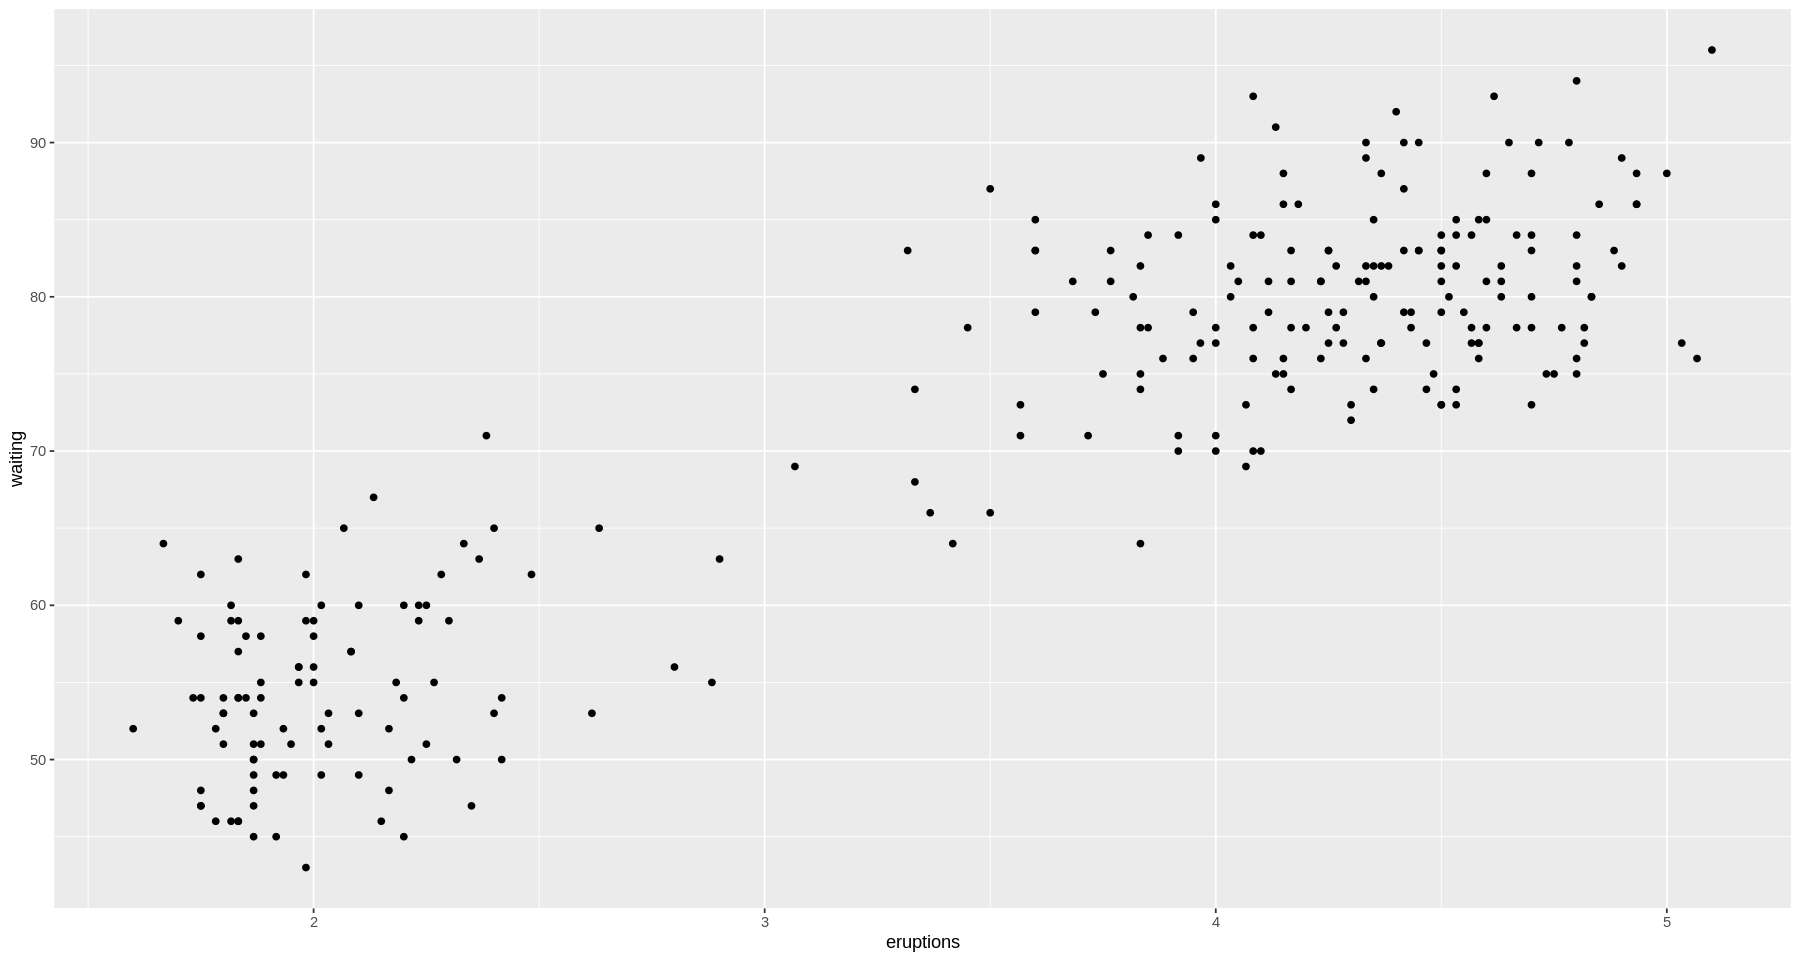

In [238]:
# global data, mapping

ggplot(data = df, mapping = aes(x = eruptions, y = waiting)) +
    geom_point()

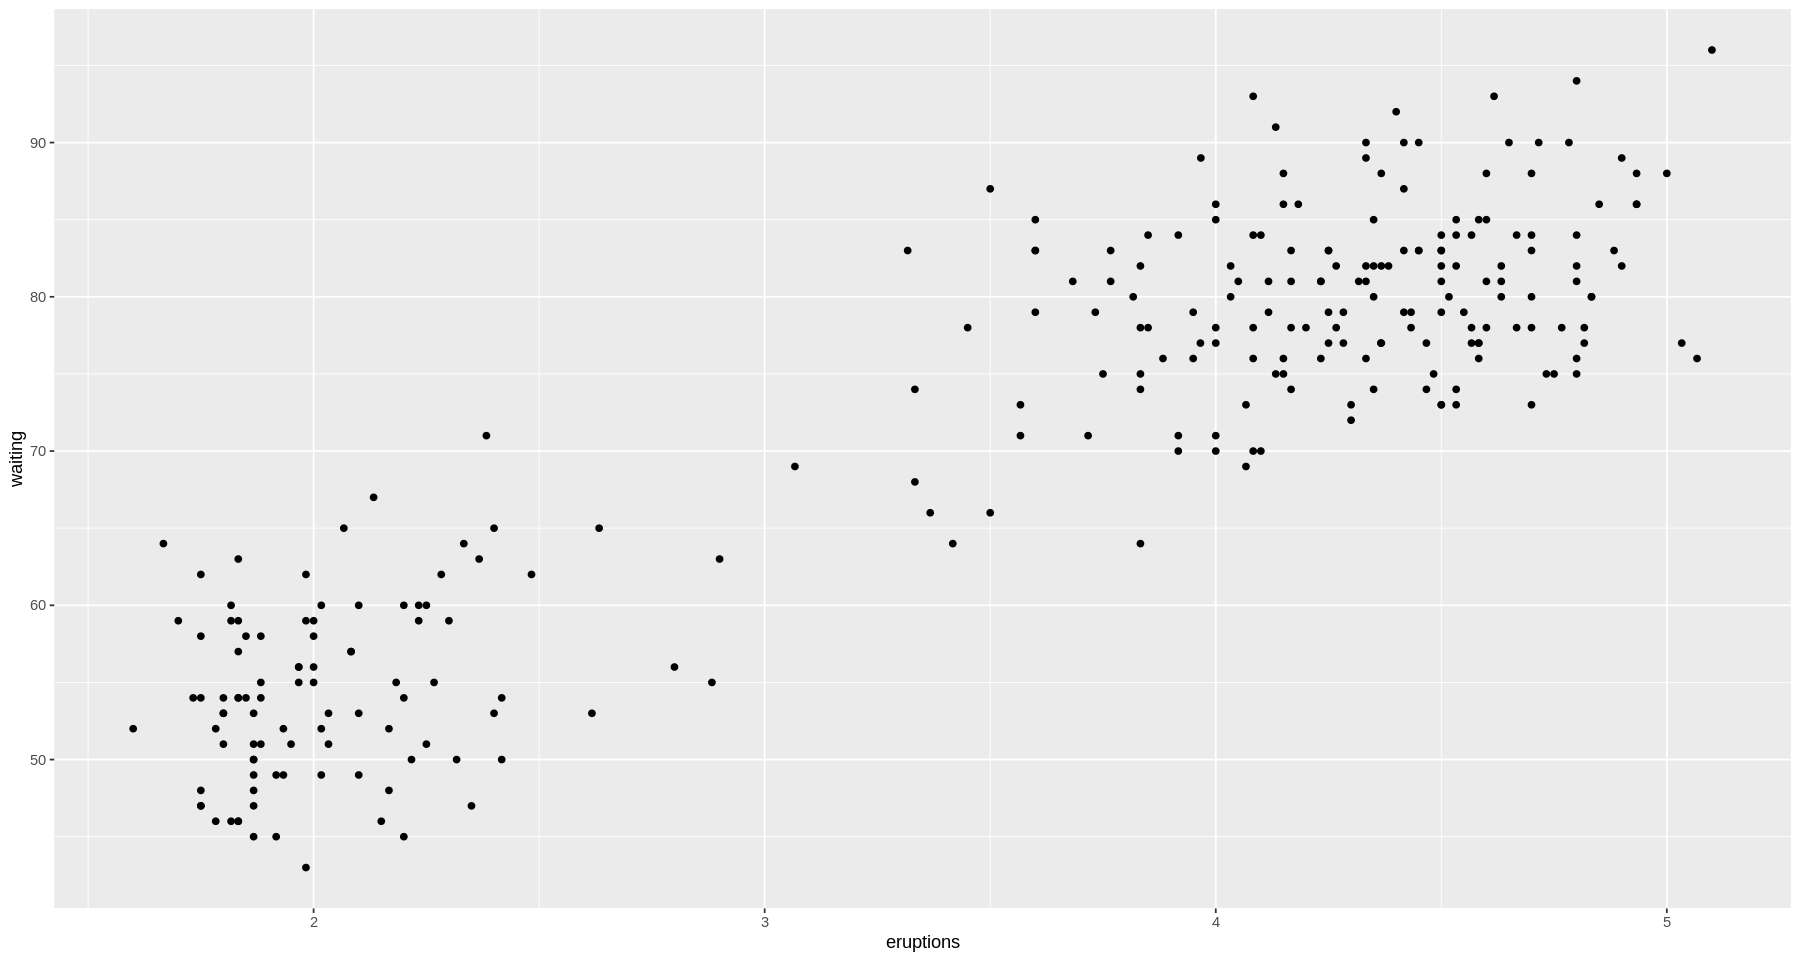

In [239]:
# not global data, mapping -> only geom layer

ggplot() +
    geom_point(data = df, mapping = aes(x = eruptions, y = waiting))

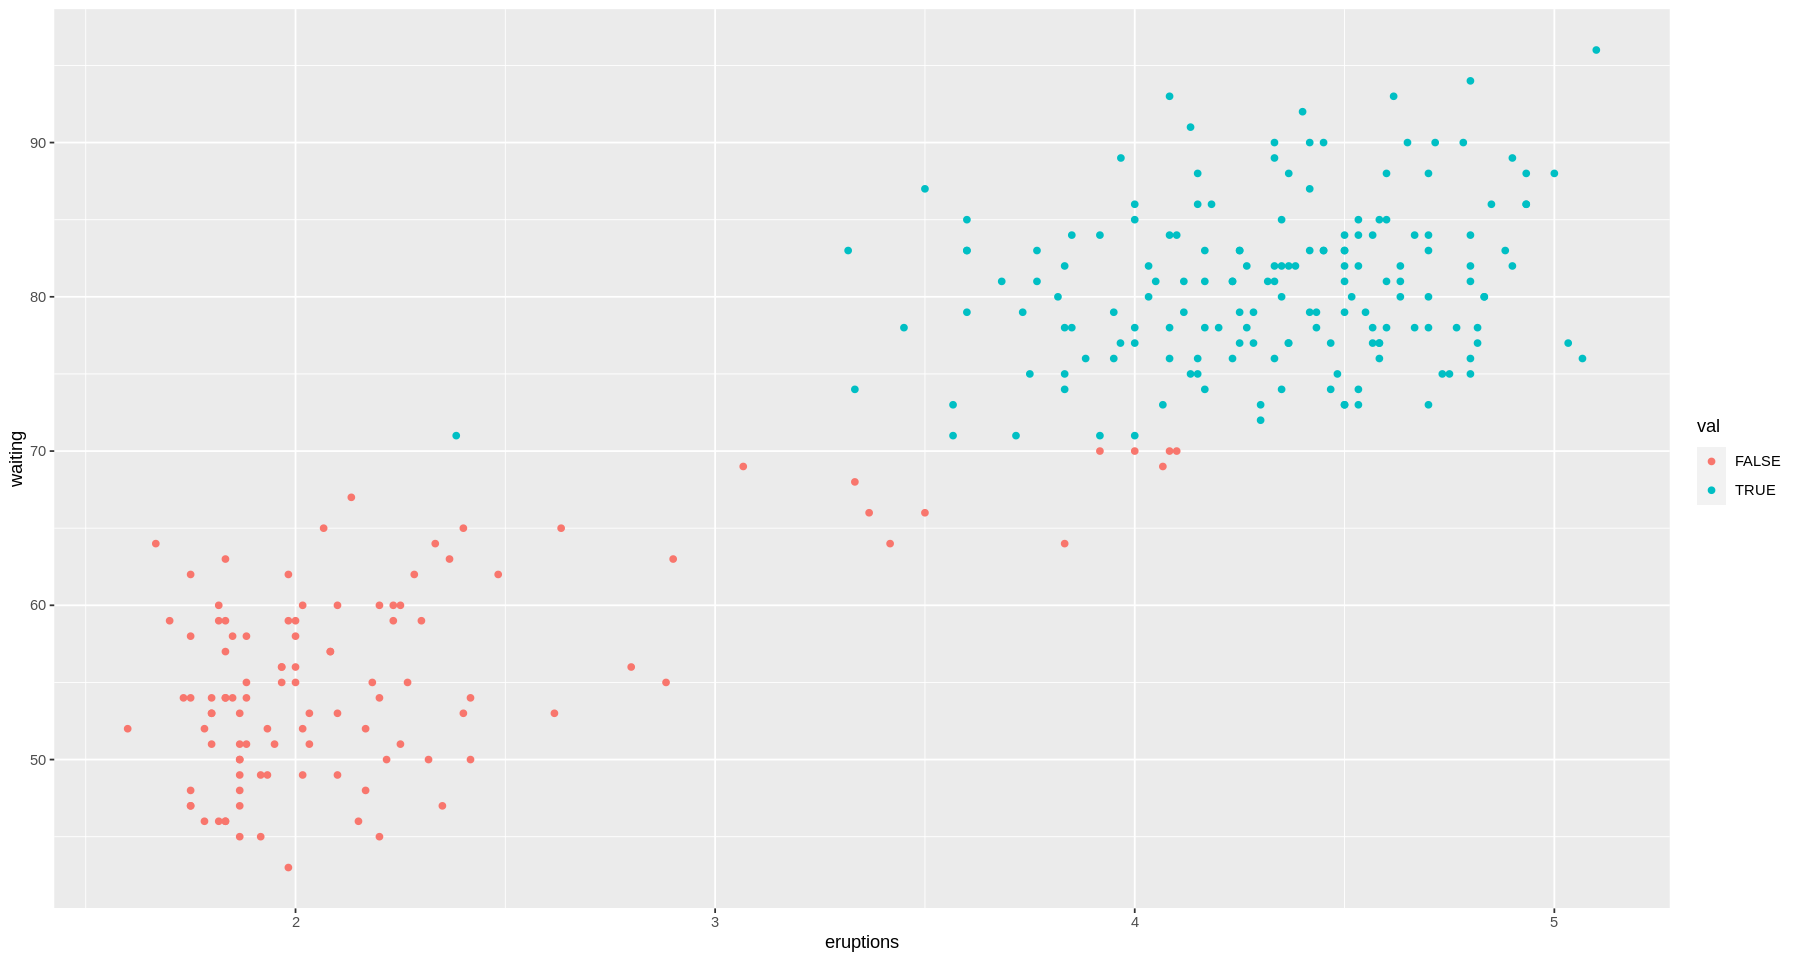

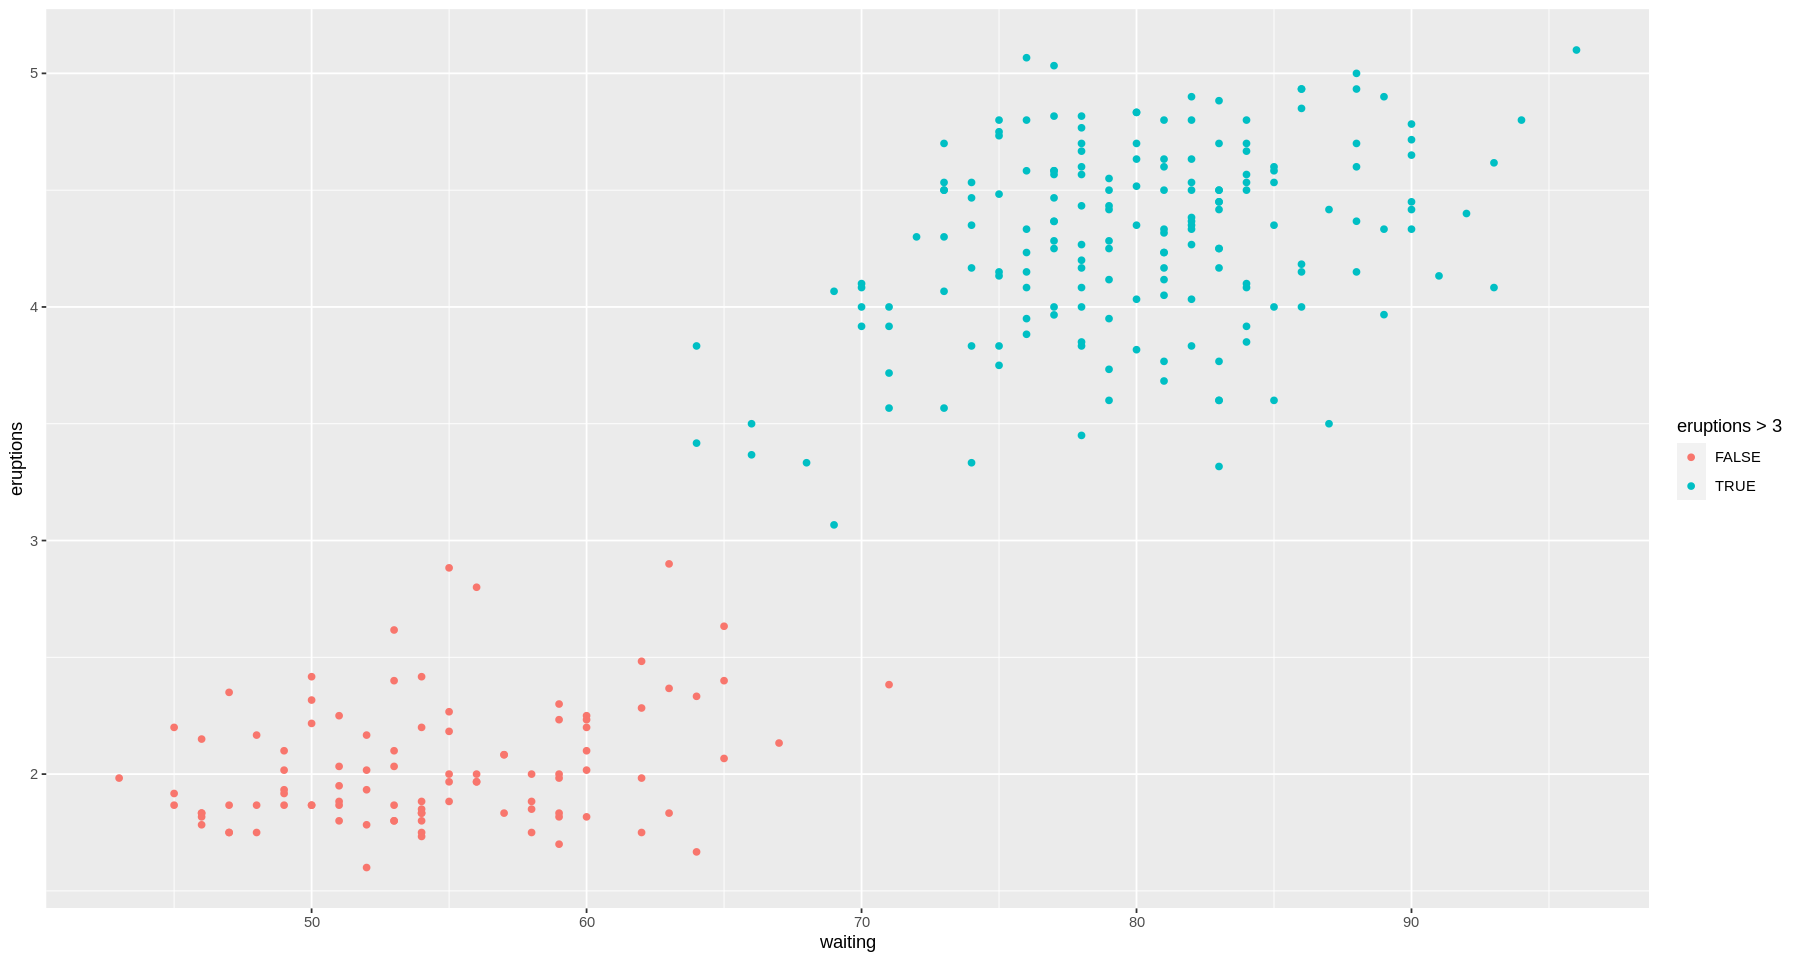

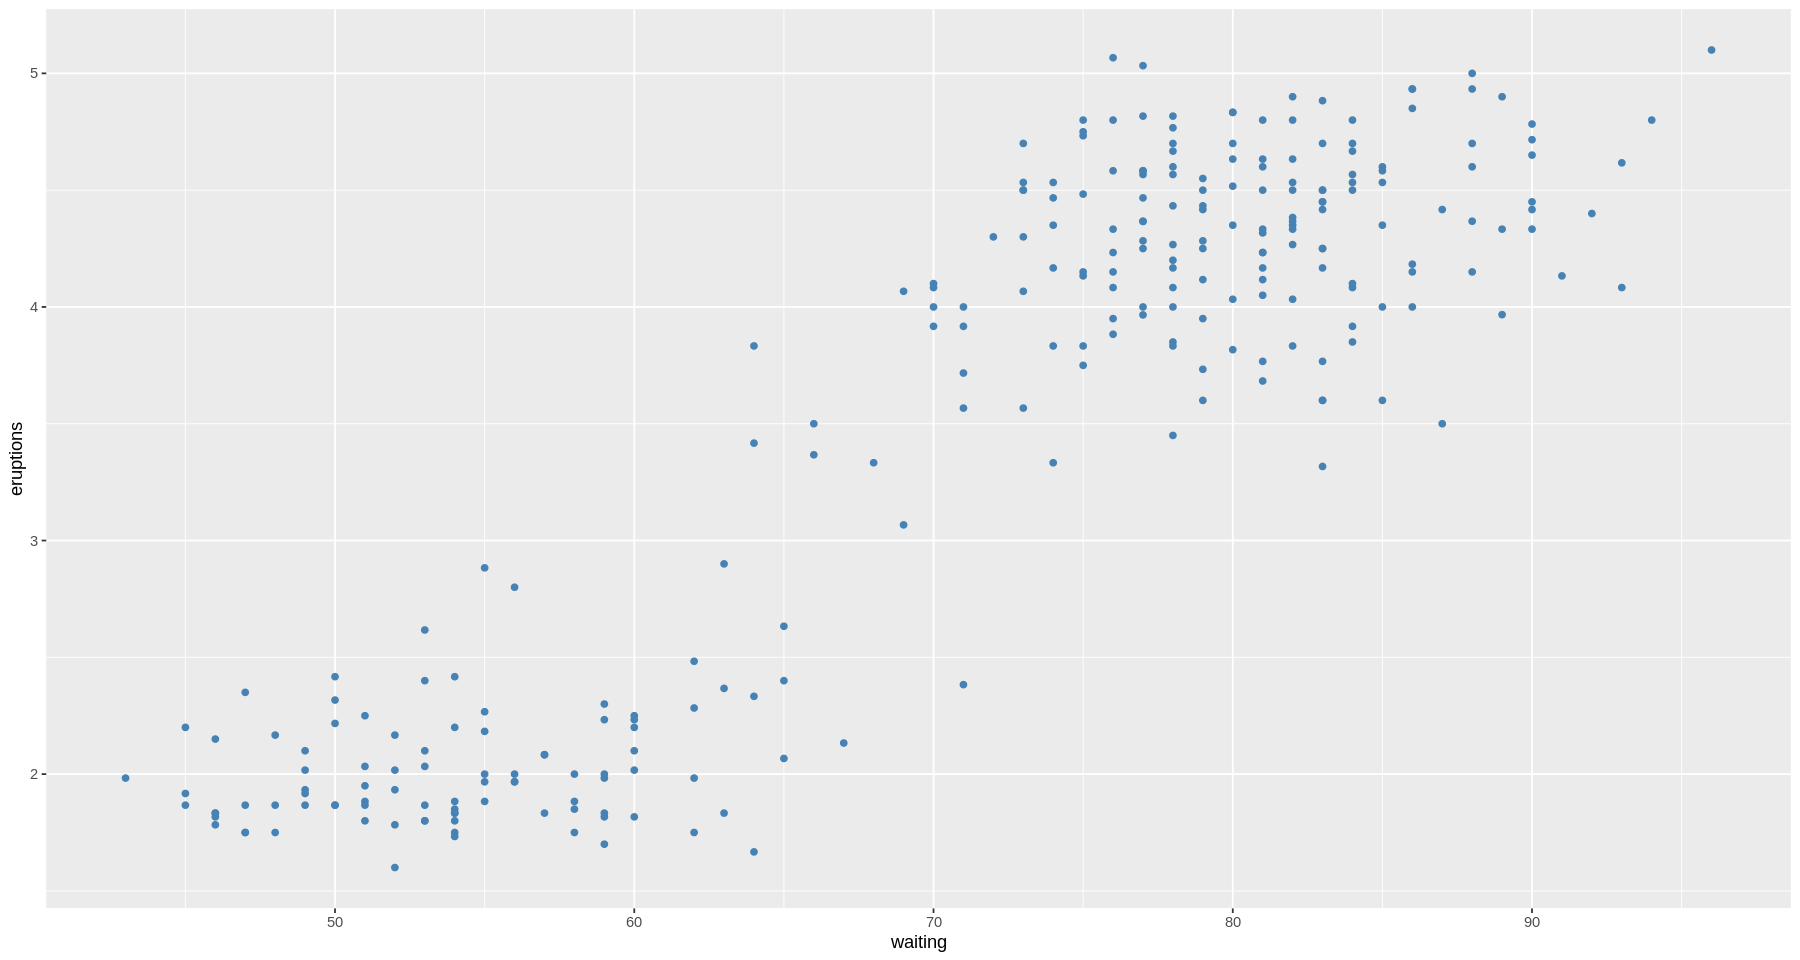

In [240]:
# mapping color

ggplot(data = df) +
    geom_point(mapping = aes(x = eruptions, y = waiting, color = val))

ggplot(data = df) +
    geom_point(mapping = aes(x = waiting, y = eruptions, color = eruptions > 3))

ggplot(data = df) +
    geom_point(mapping = aes(x = waiting, y = eruptions), color = 'steelblue')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


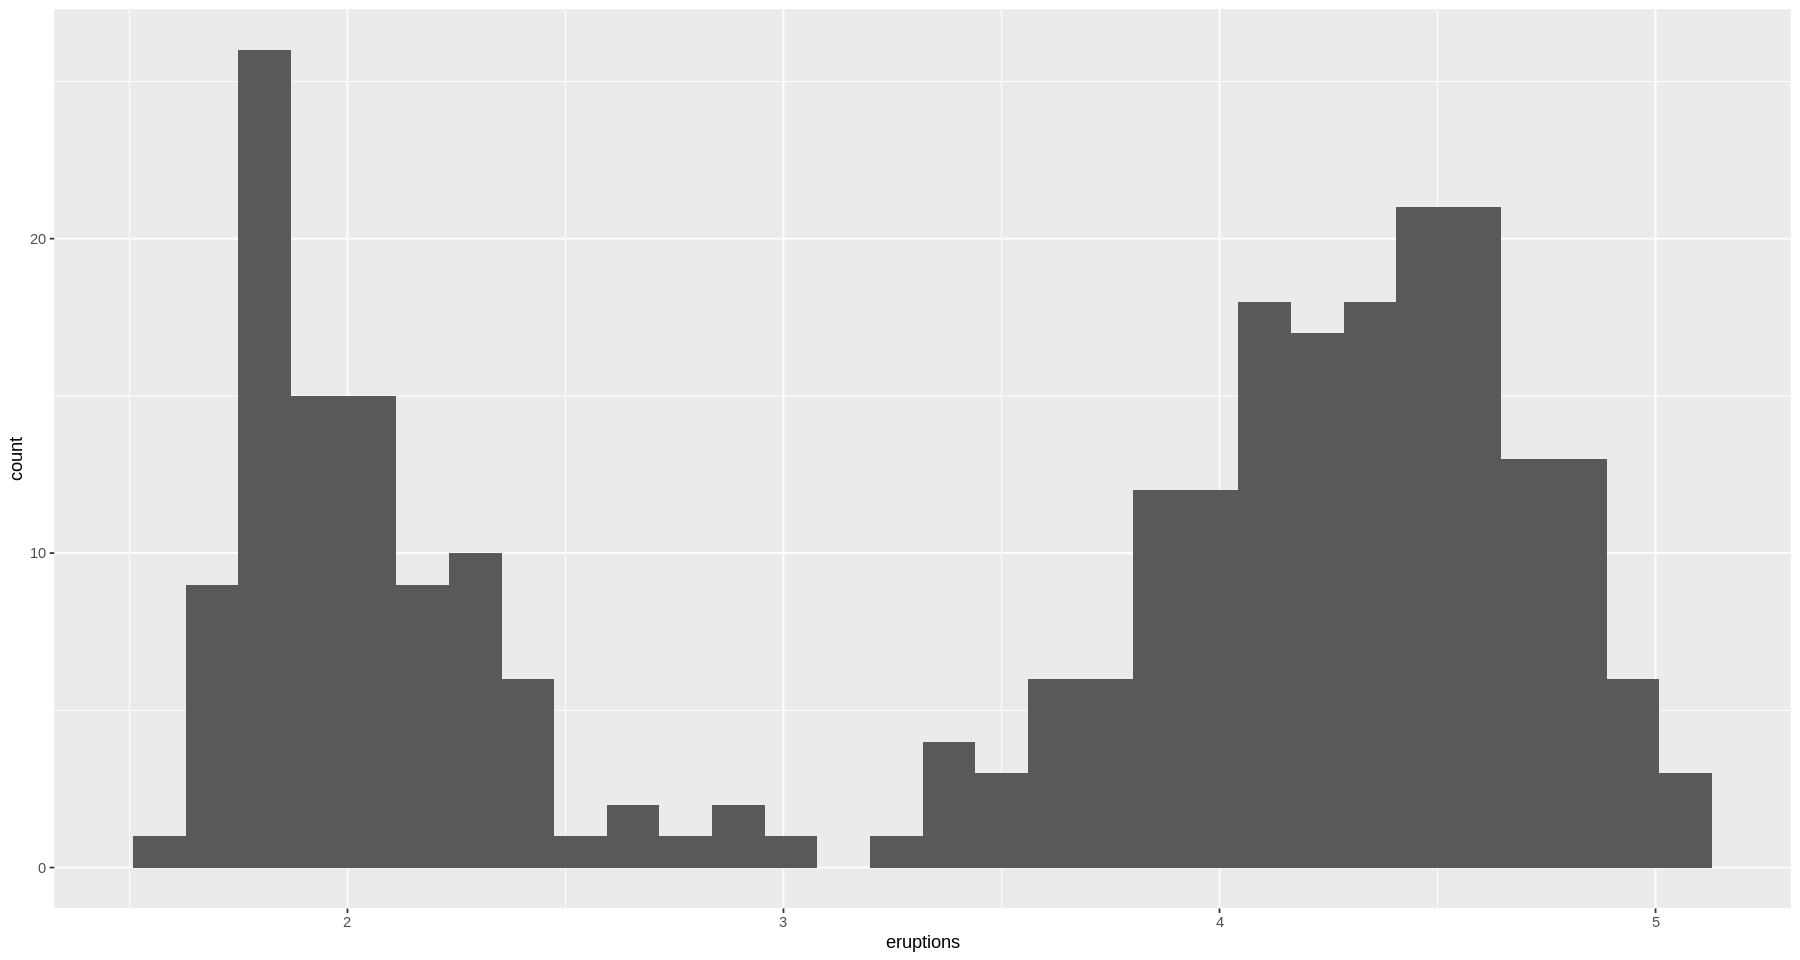

In [241]:
# histogram

ggplot(data = faithful) +
    geom_histogram(mapping = aes(eruptions))

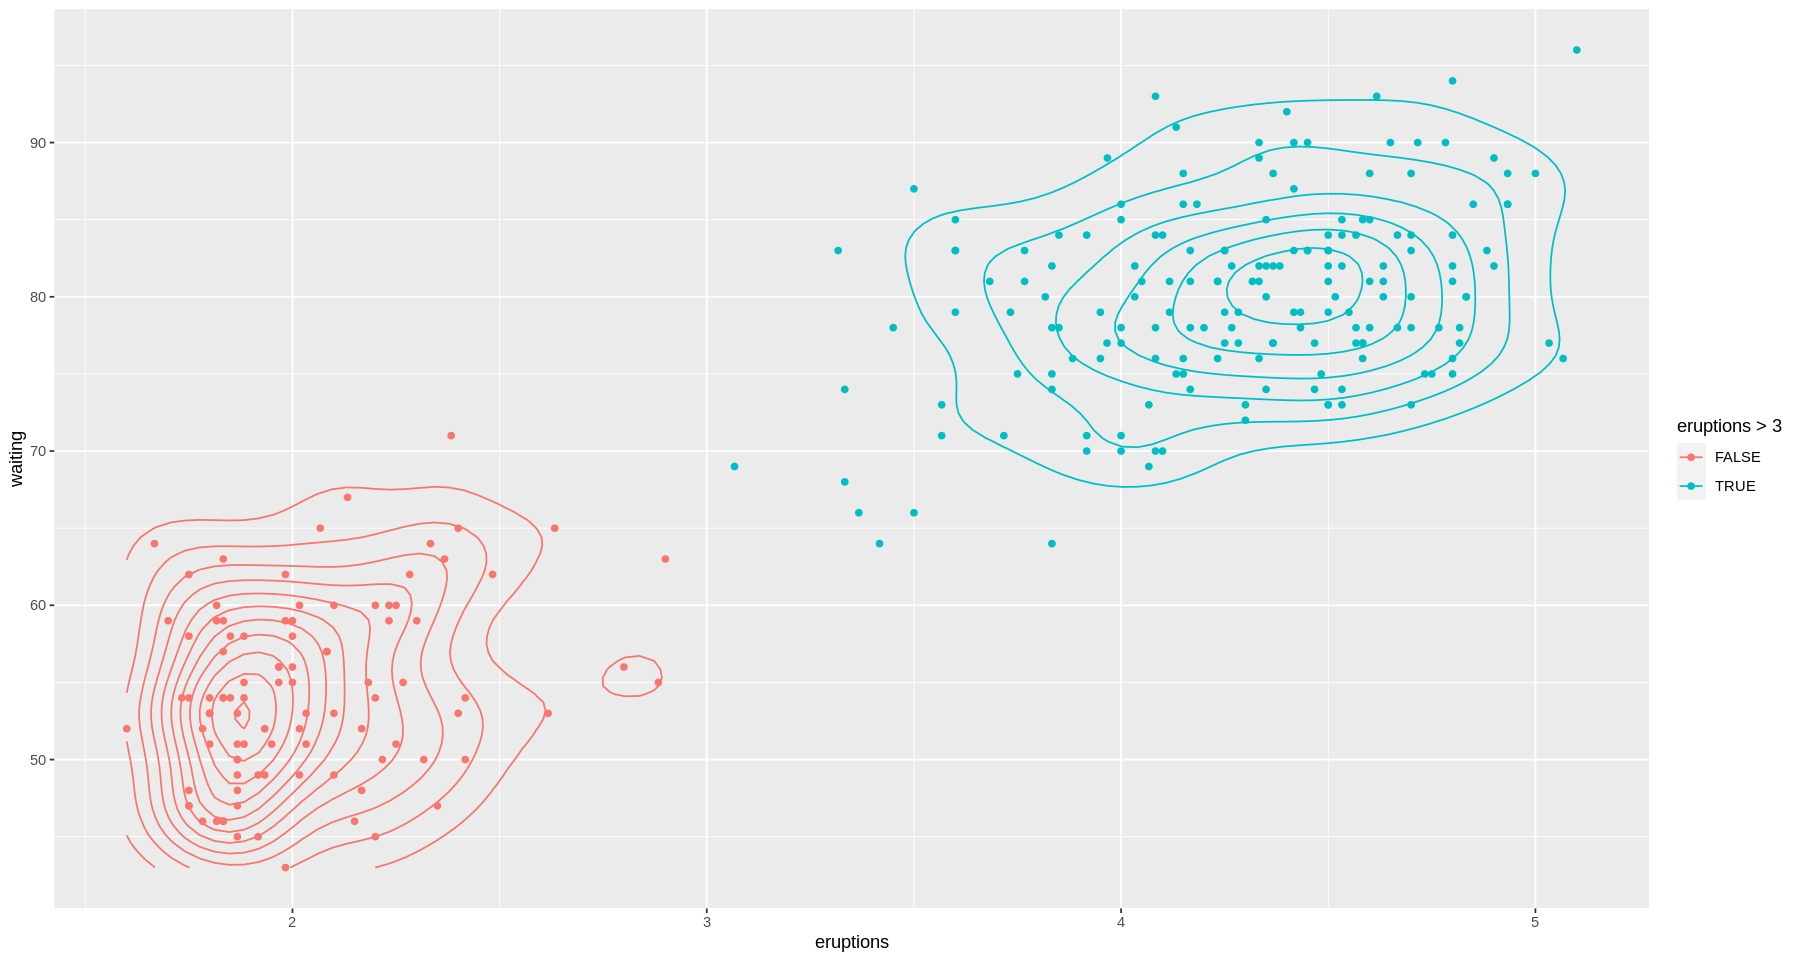

In [242]:
# Layers are stacked in the order of code appearance

ggplot(faithful, aes(x = eruptions, y = waiting, color = eruptions > 3)) +
    geom_density_2d() + 
    geom_point()

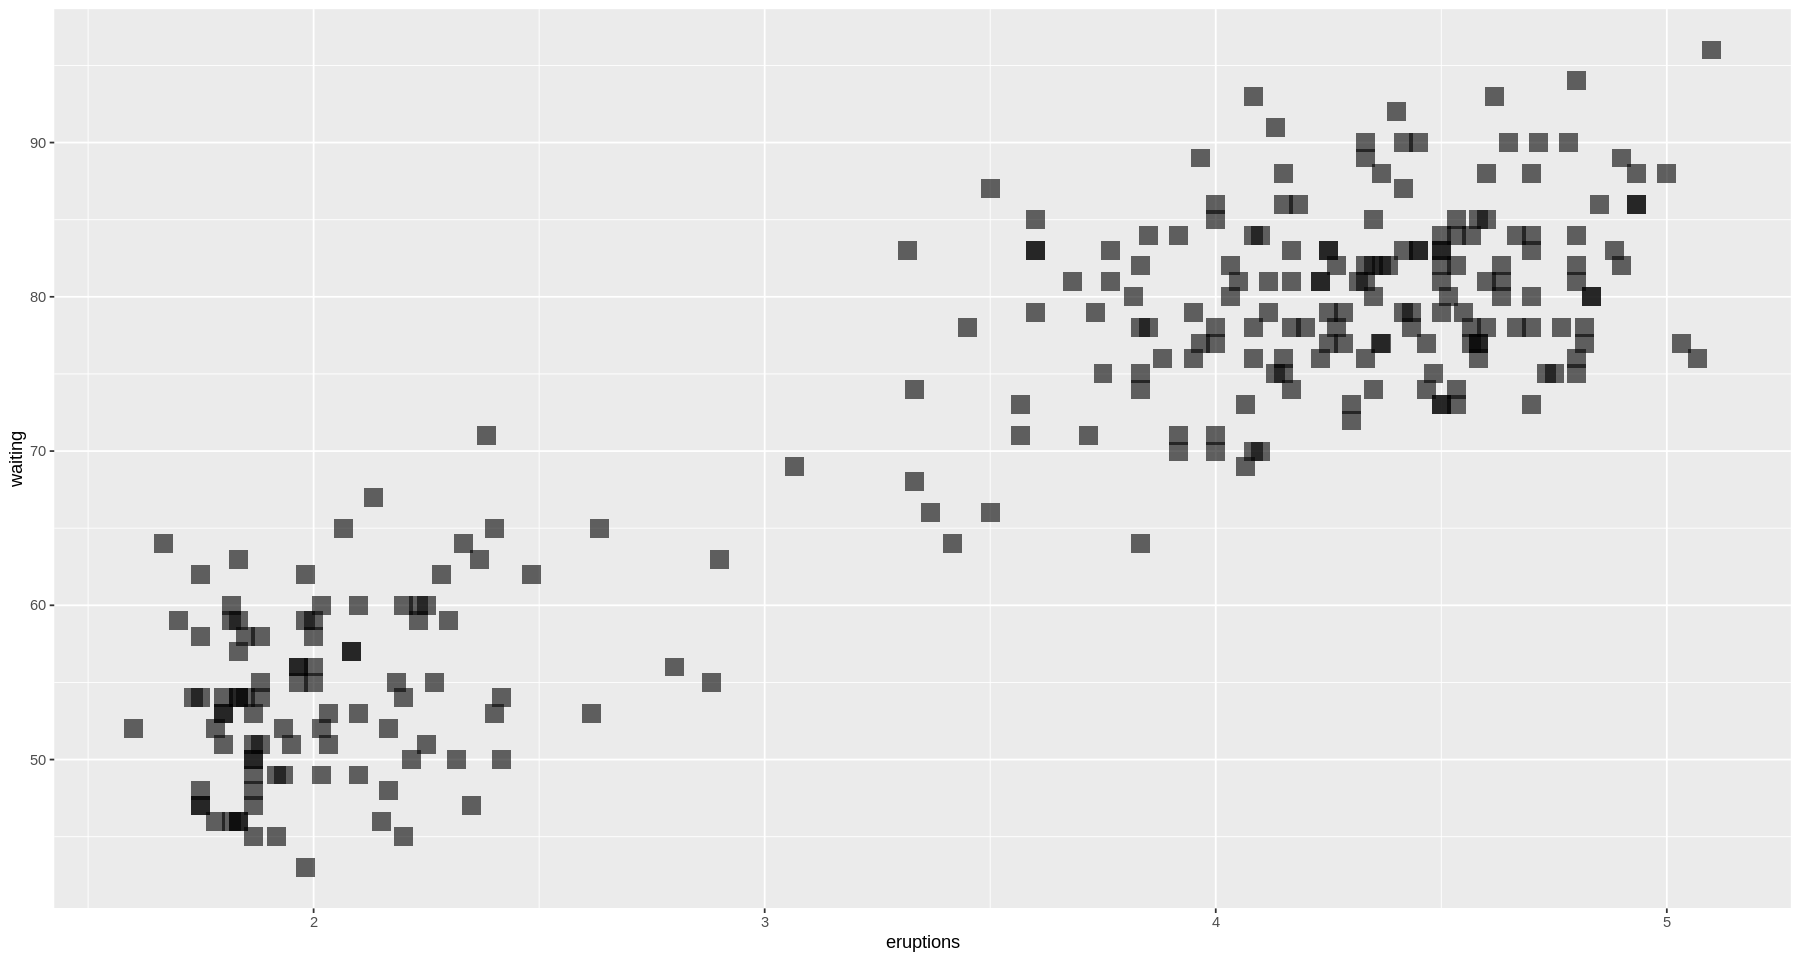

In [243]:
ggplot(faithful) + 
    geom_point(aes(x = eruptions, y = waiting), alpha = 0.6, size = 5, shape = 'square')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


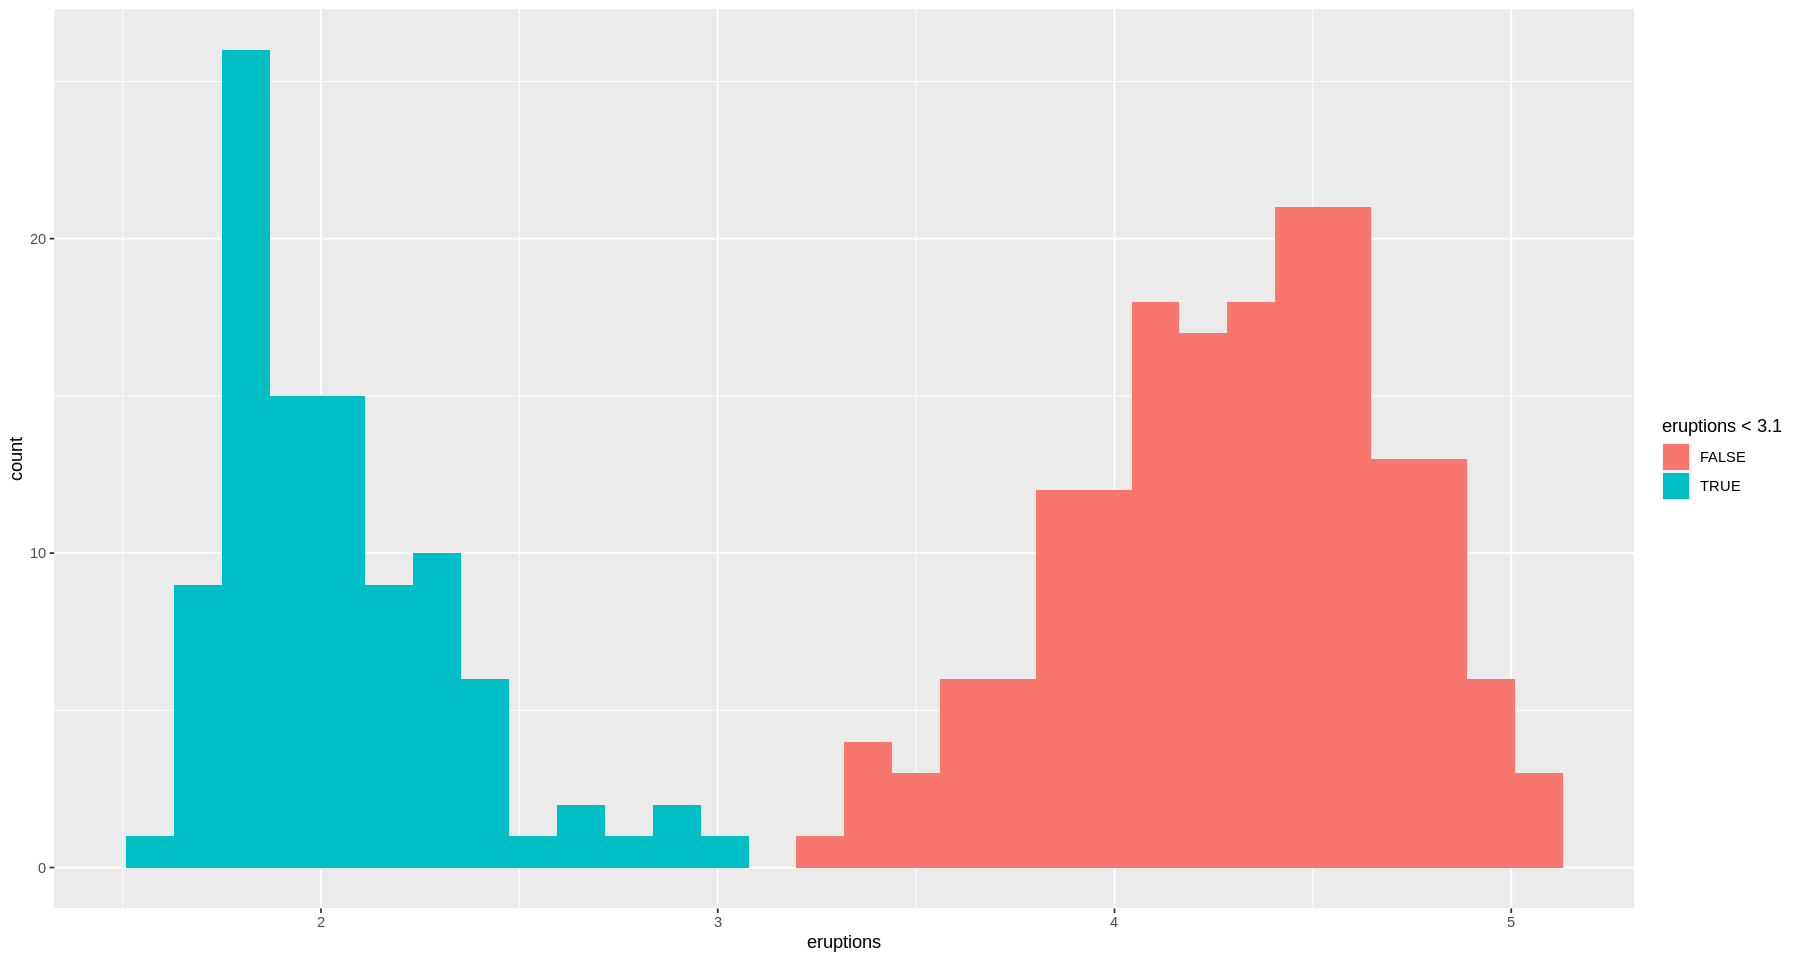

In [244]:
ggplot(faithful) +
    geom_histogram(aes(x = eruptions, fill = eruptions < 3.1))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


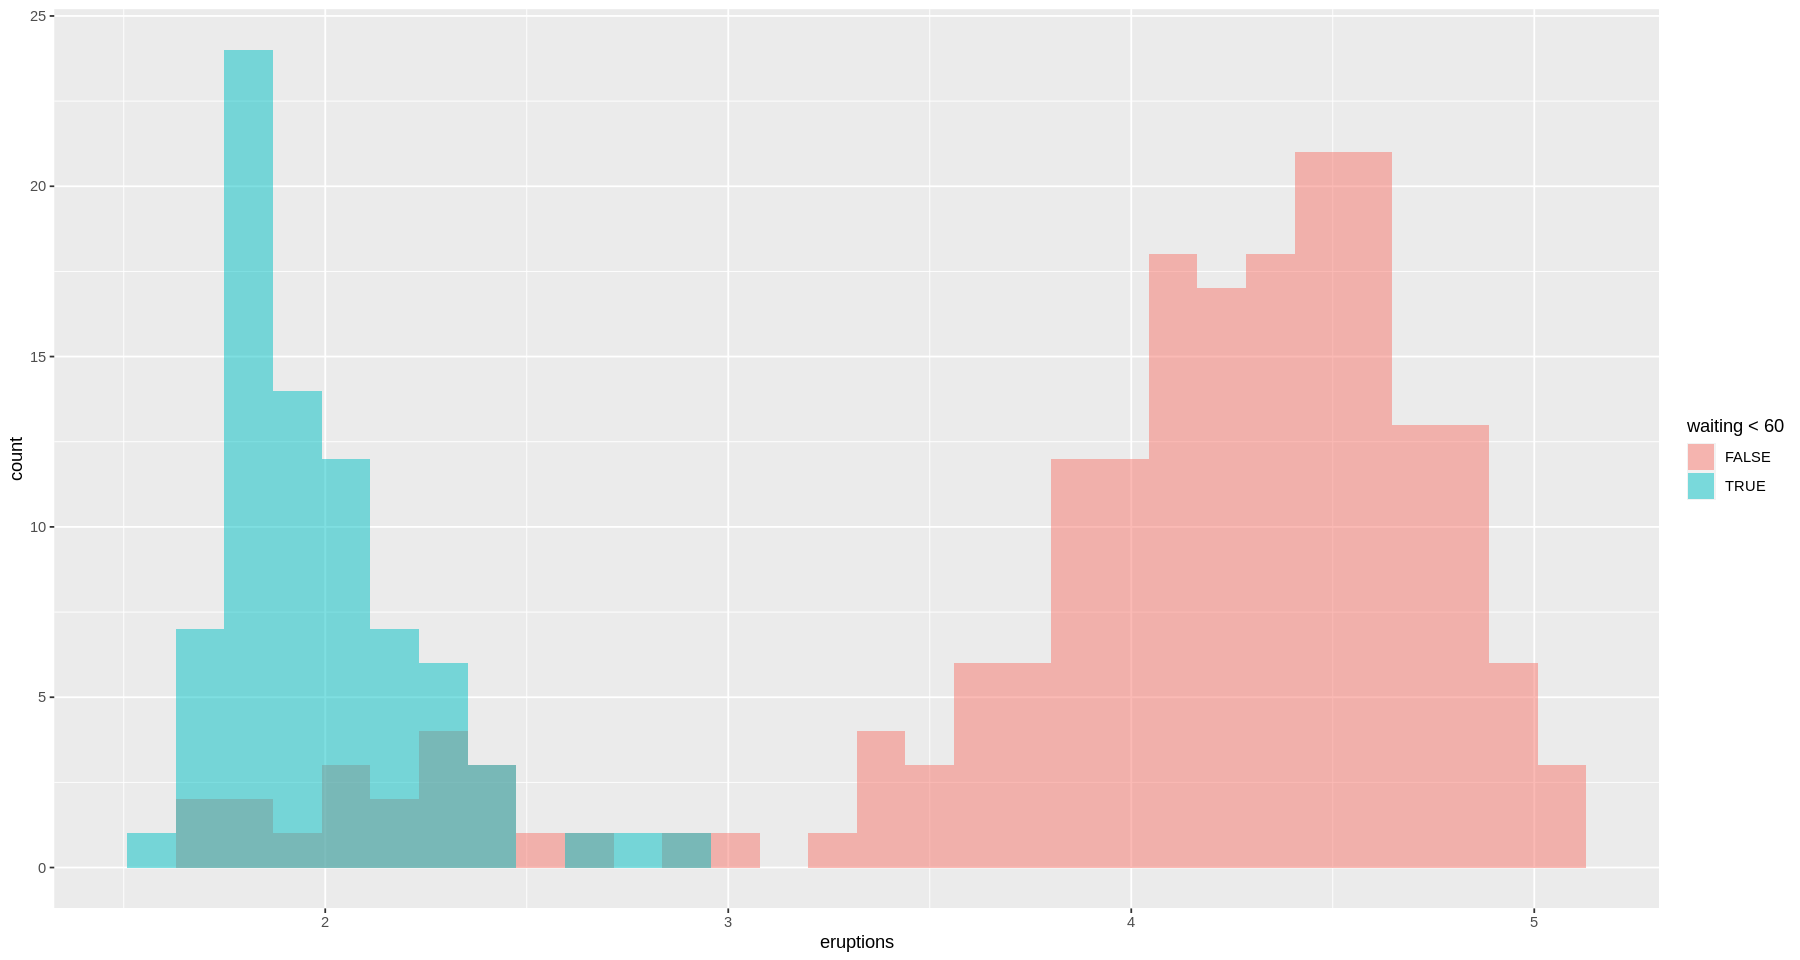

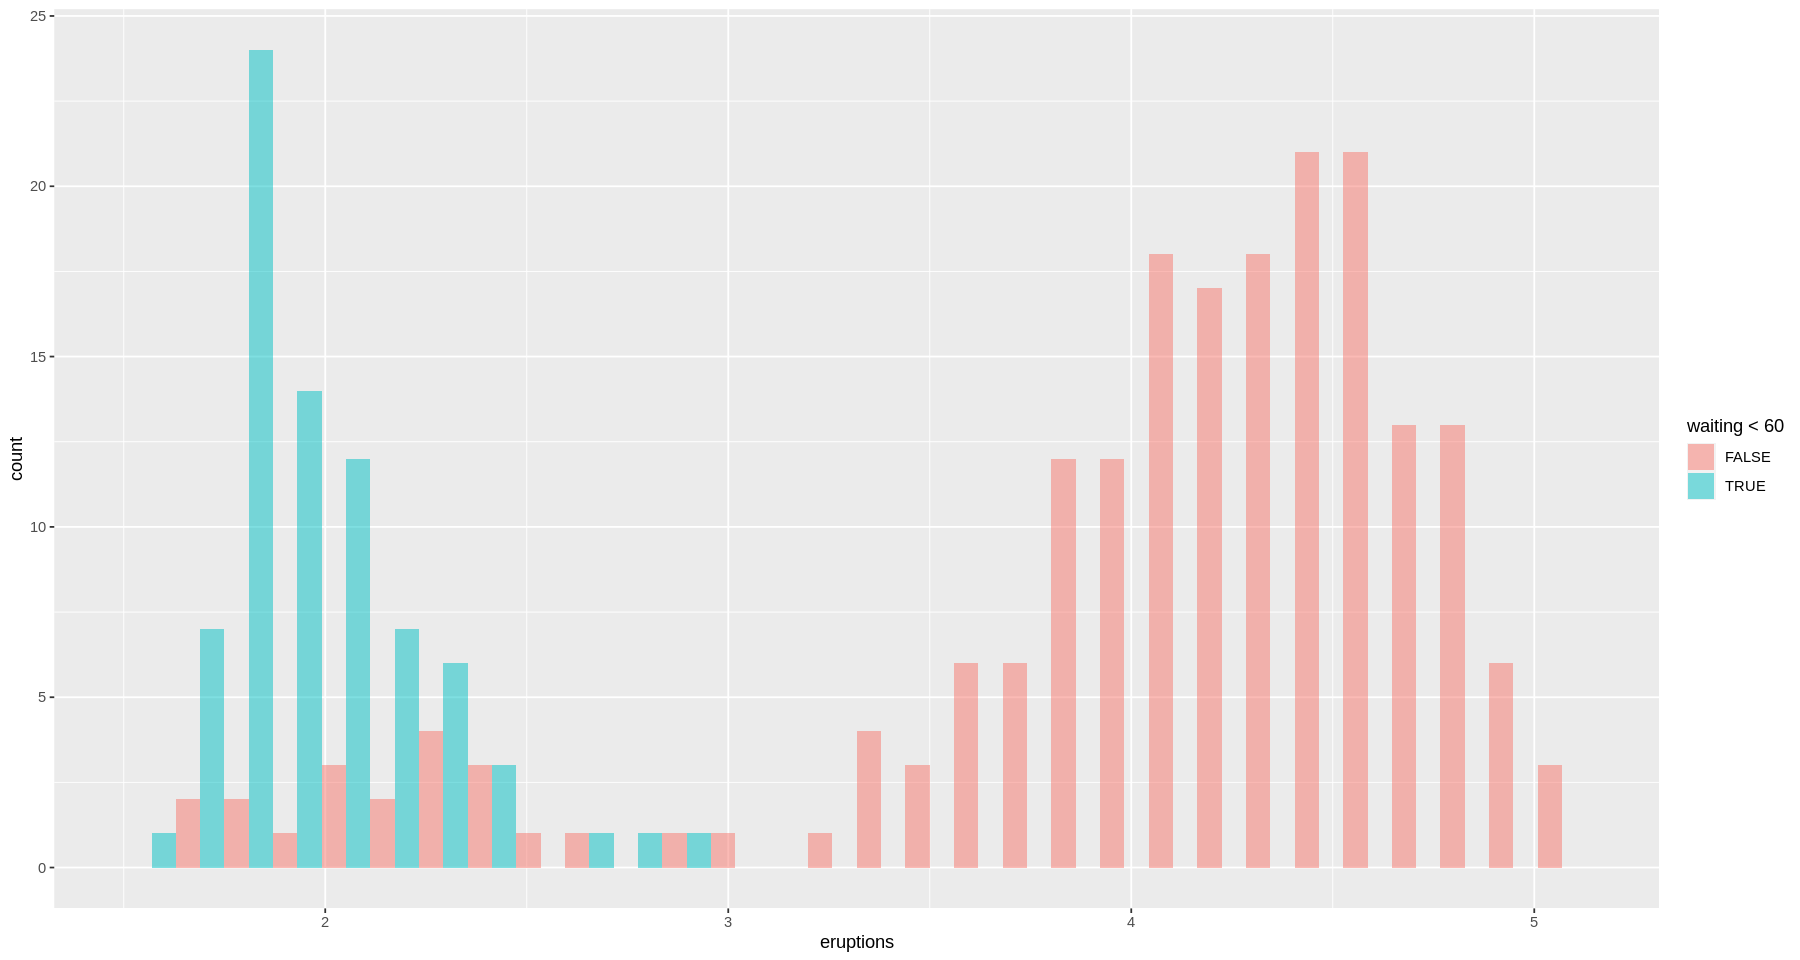

In [245]:
ggplot(faithful) +
    geom_histogram(aes(x = eruptions, fill = waiting < 60), position = 'identity', alpha = 0.5)

ggplot(faithful) +
    geom_histogram(aes(x = eruptions, fill = waiting < 60), position = 'dodge', alpha = 0.5)

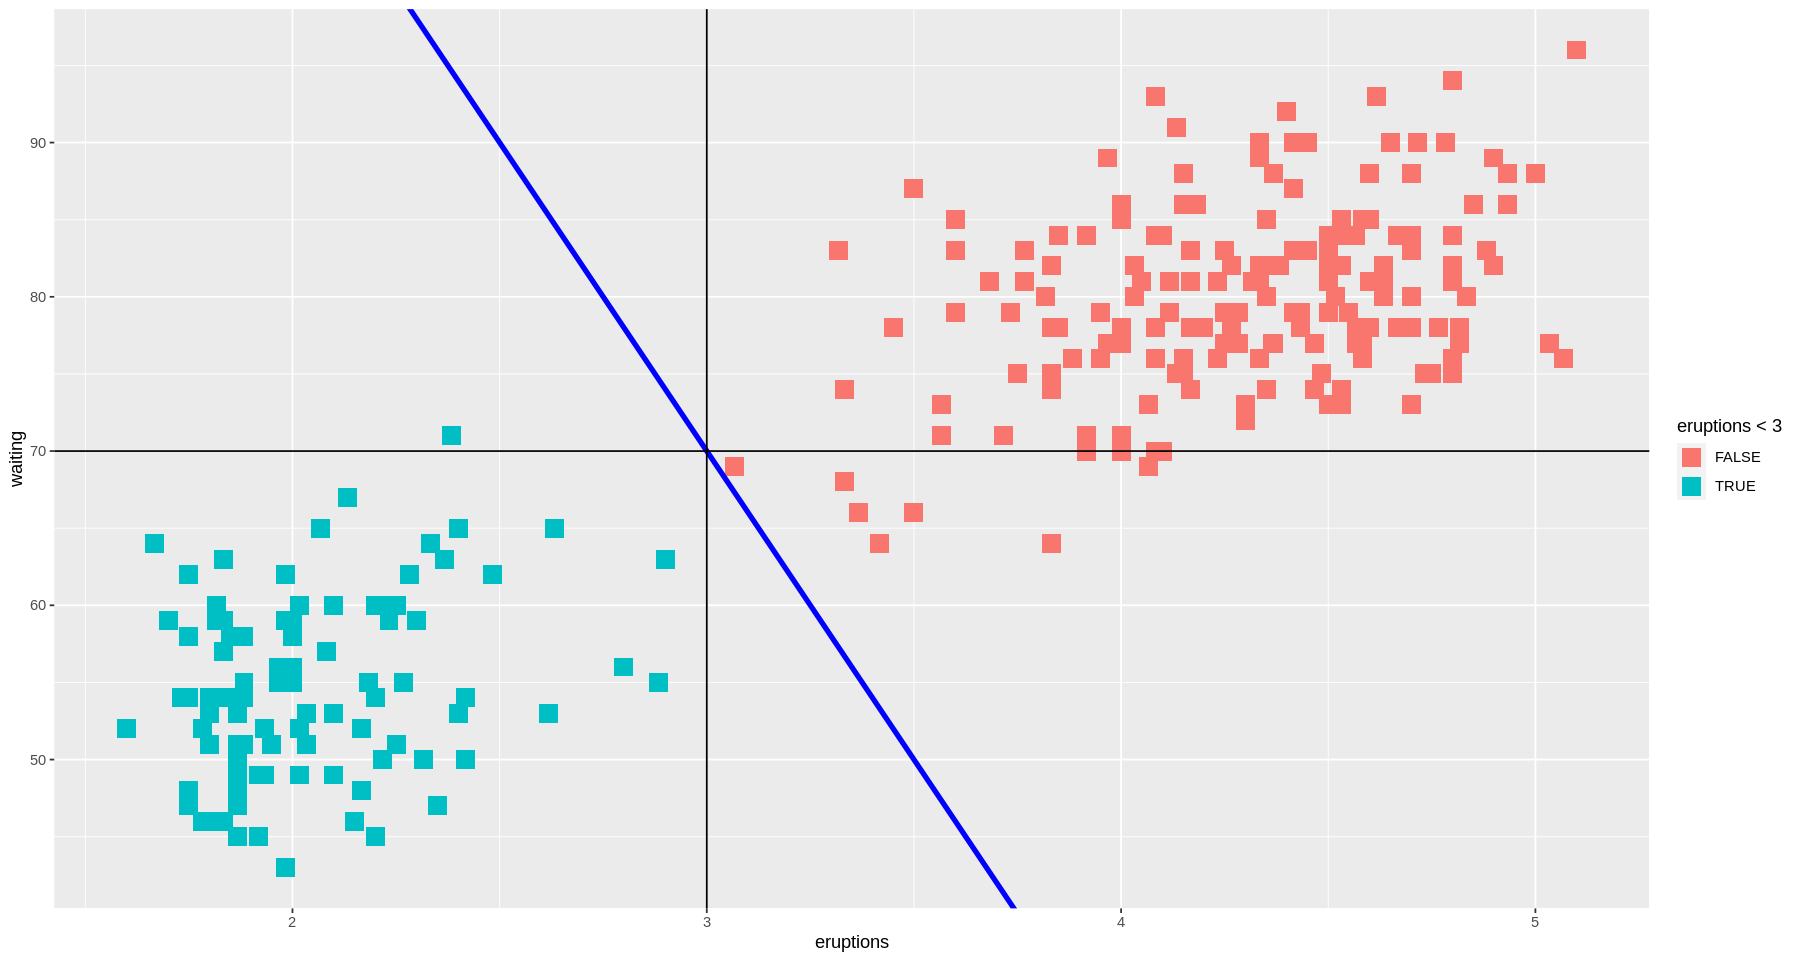

In [318]:
ggplot(faithful) +
    geom_point(aes(x = eruptions, y = waiting, color = eruptions < 3), size = 5, shape = 'square') +
    geom_abline(slope = -40, intercept = 190, linewidth = 1.5, color = 'blue') +
    geom_hline(yintercept = 70) +
    geom_vline(xintercept = 3)

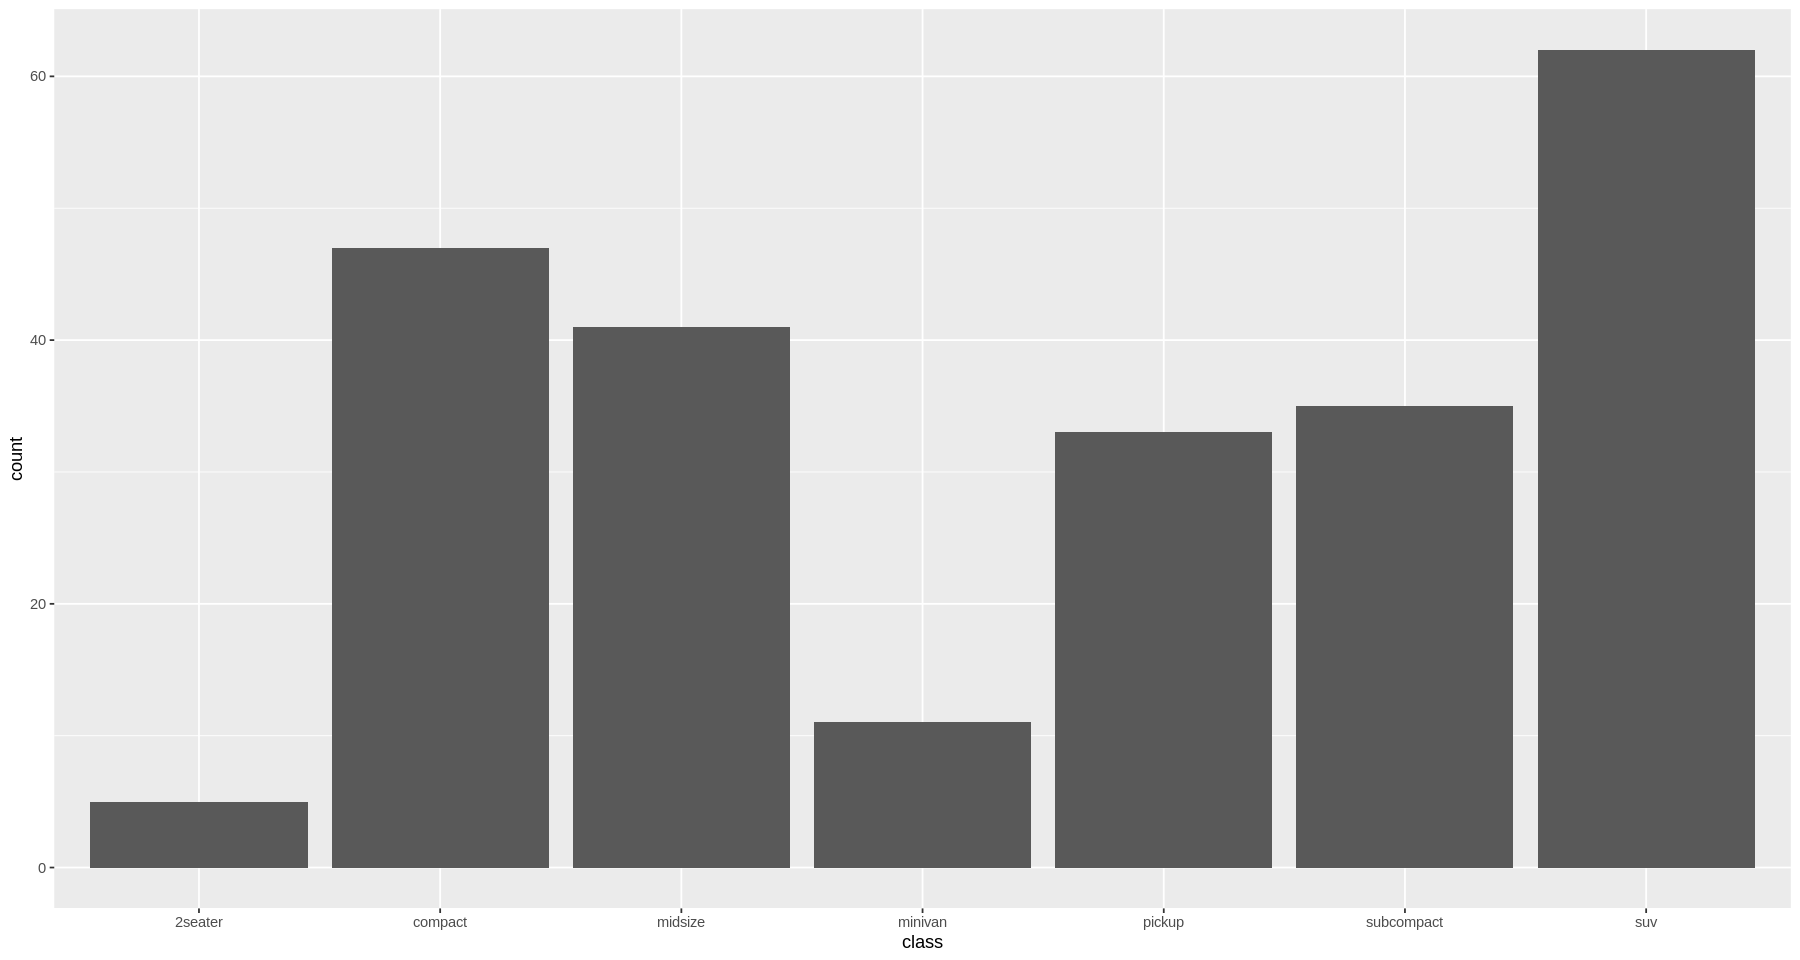

In [247]:
ggplot(mpg) + 
    geom_bar(aes(x = class))

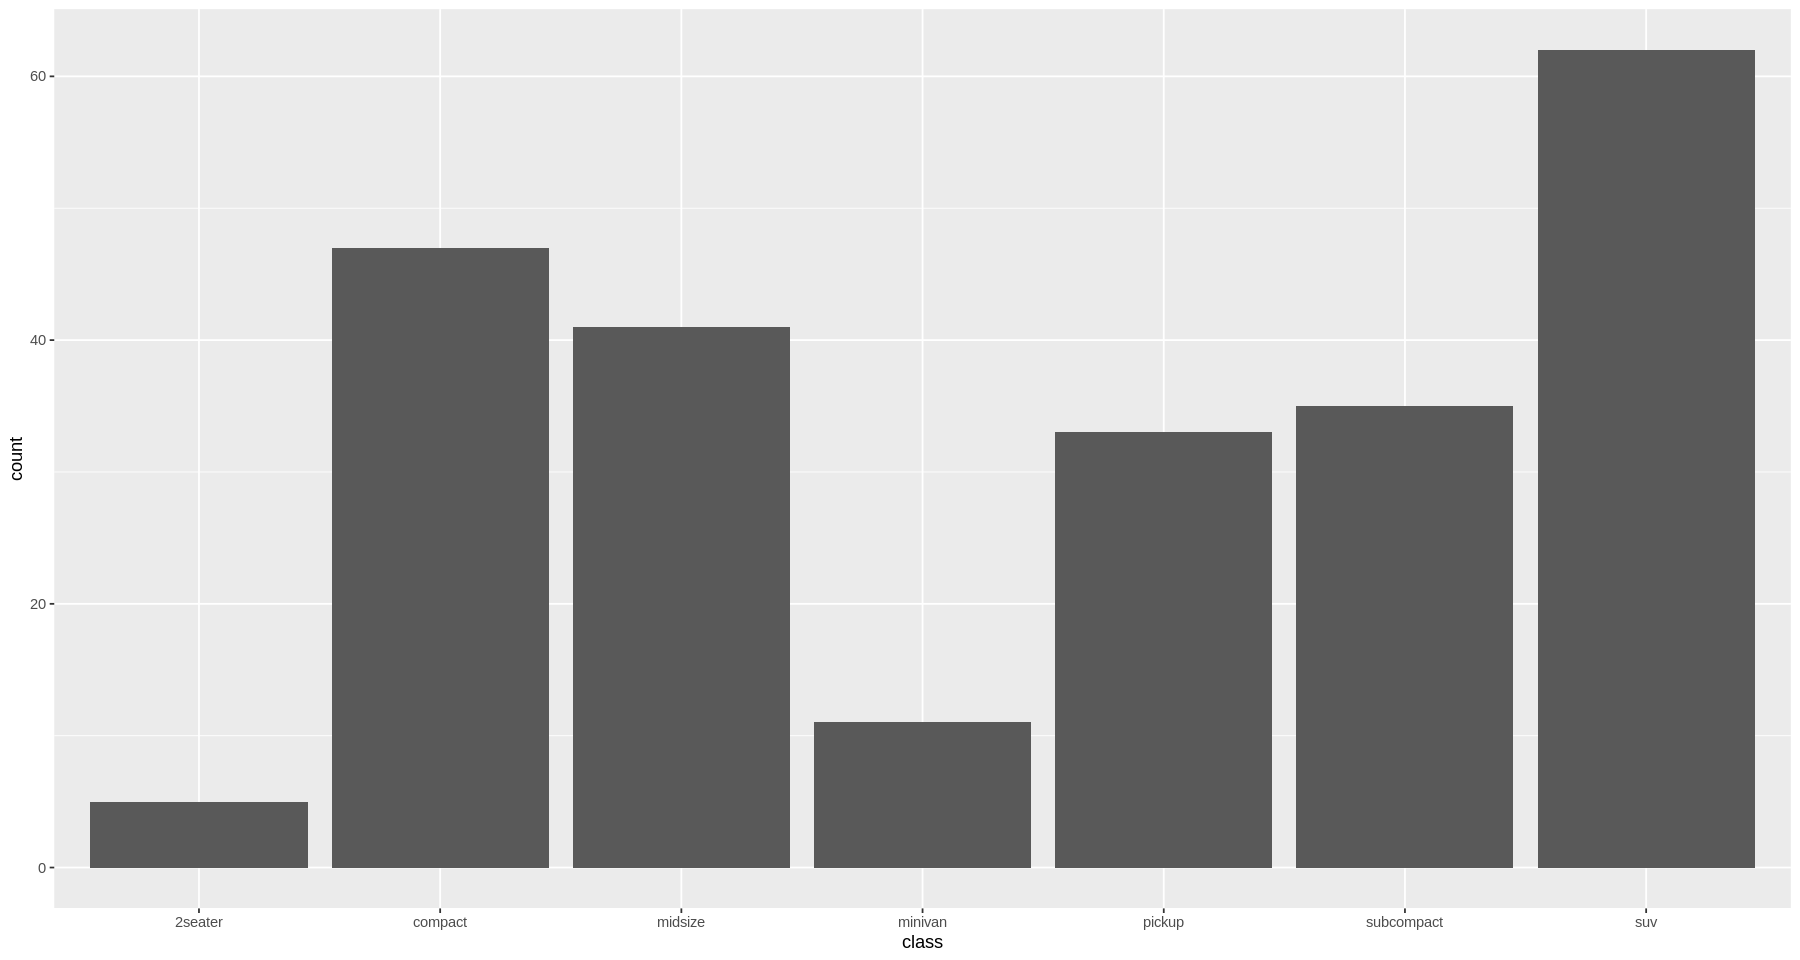

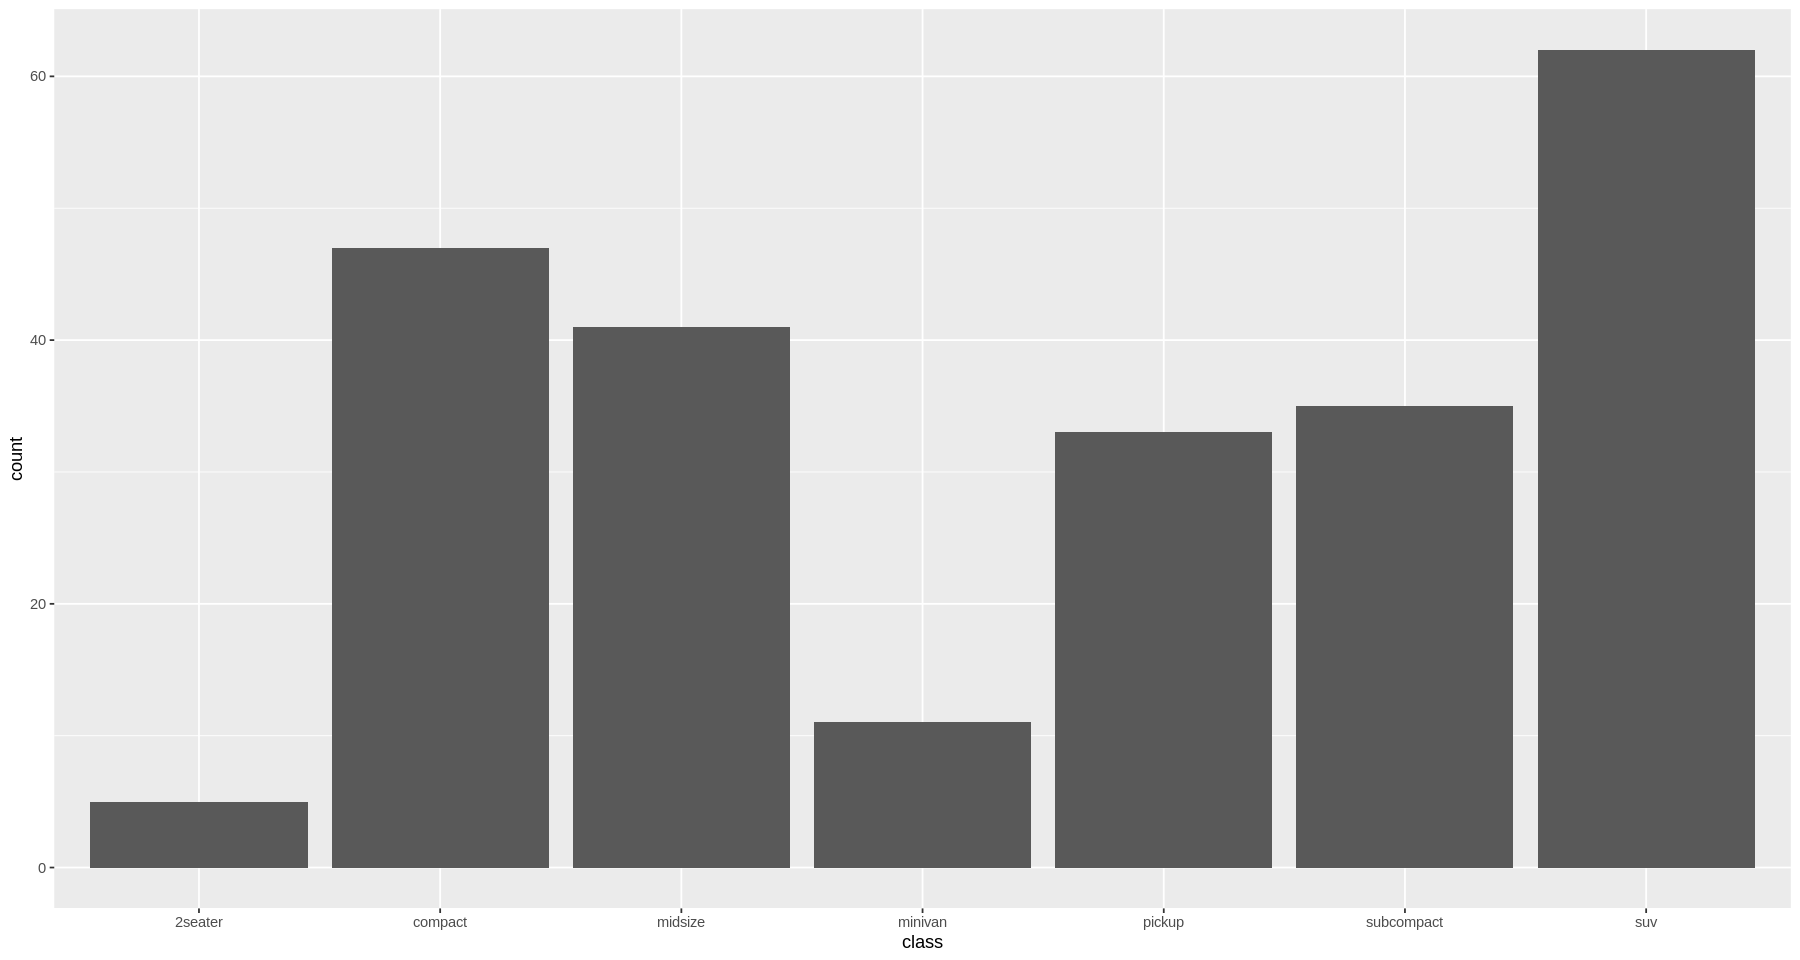

In [257]:
mpg_counted <- mpg %>%
    count(class, name = 'count')

ggplot(mpg_counted) +
    geom_bar(aes(x = class, y = count), stat = 'identity')

ggplot(mpg_counted) +
    geom_col(aes(x = class, y = count))

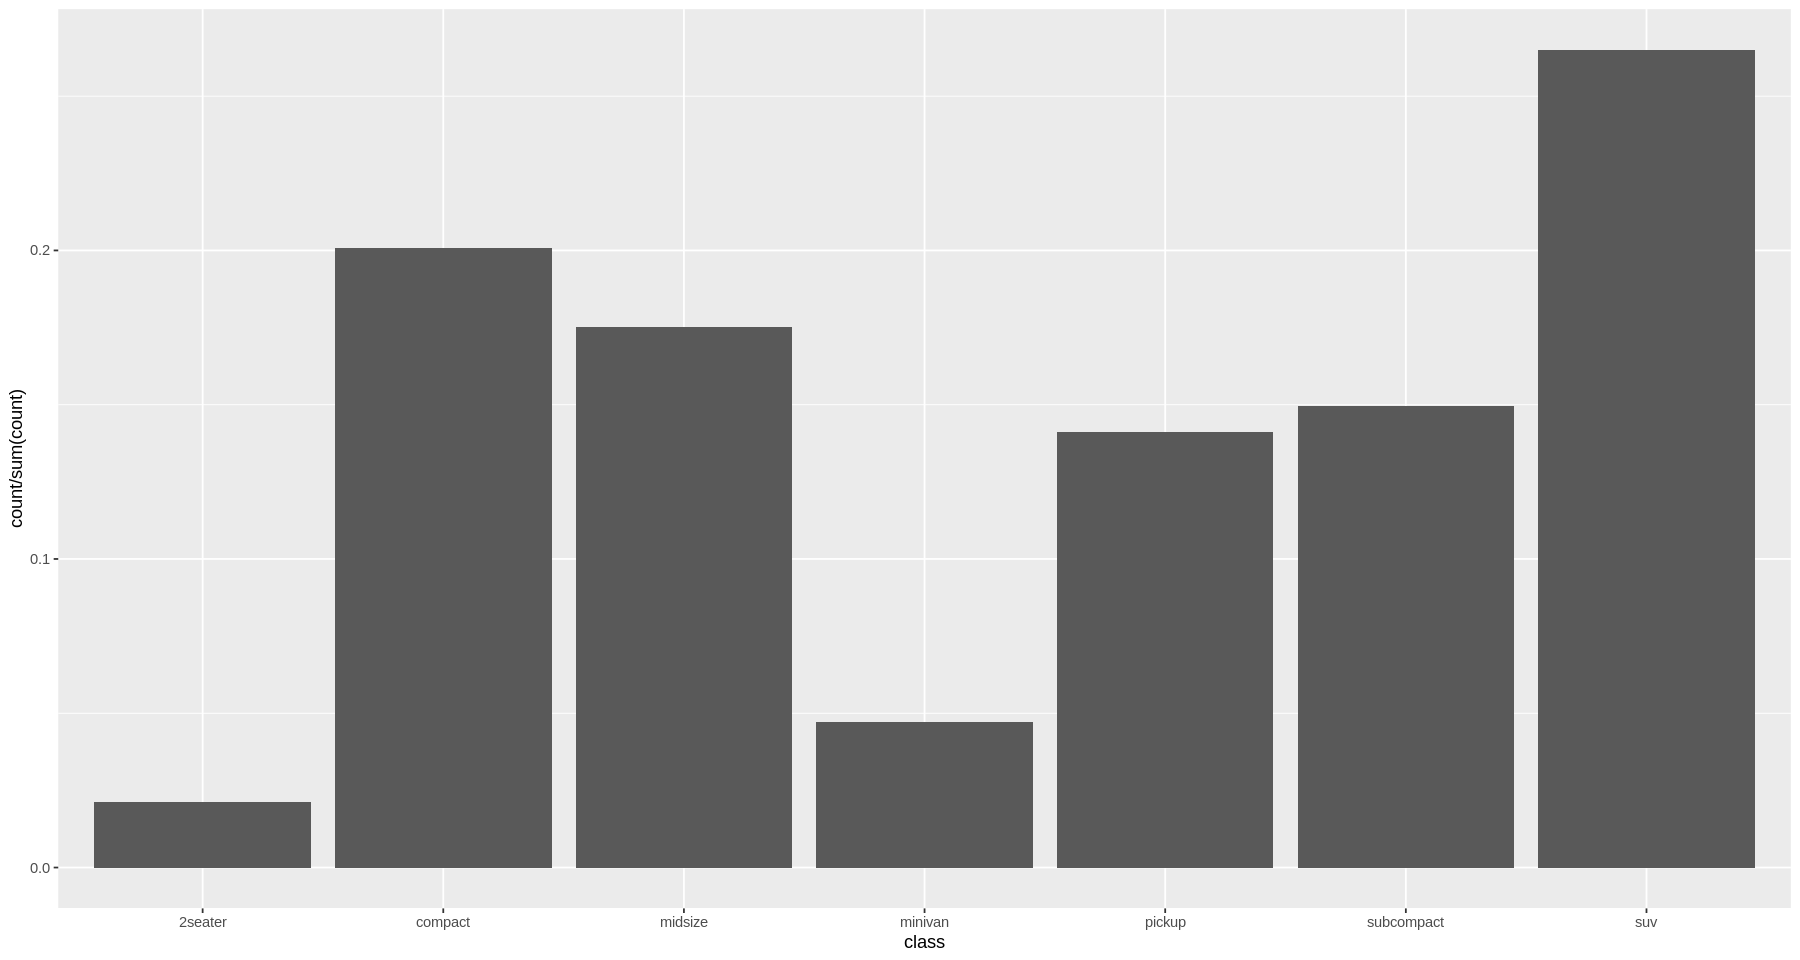

In [264]:
# count is not accessable from the outside apply after stat calculated count

ggplot(mpg) + 
    geom_bar(aes(x = class, y = after_stat(count / sum(count))))

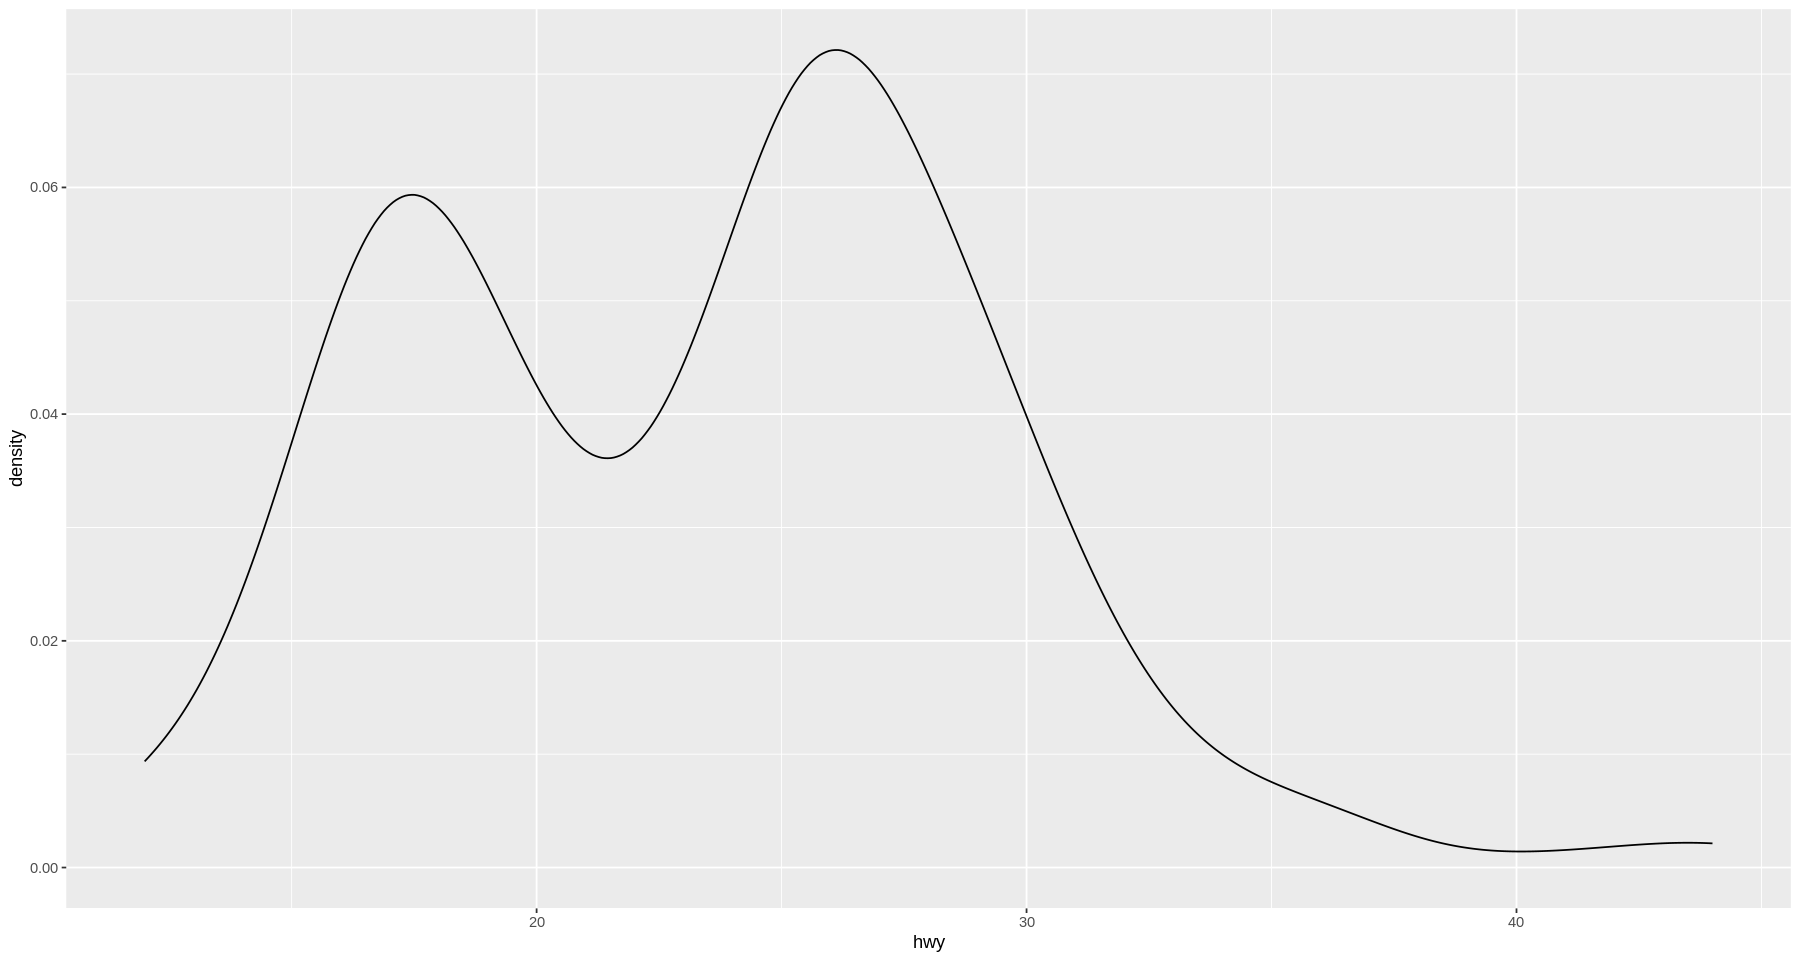

In [280]:
ggplot(mpg) +
    geom_density(aes(x = hwy))

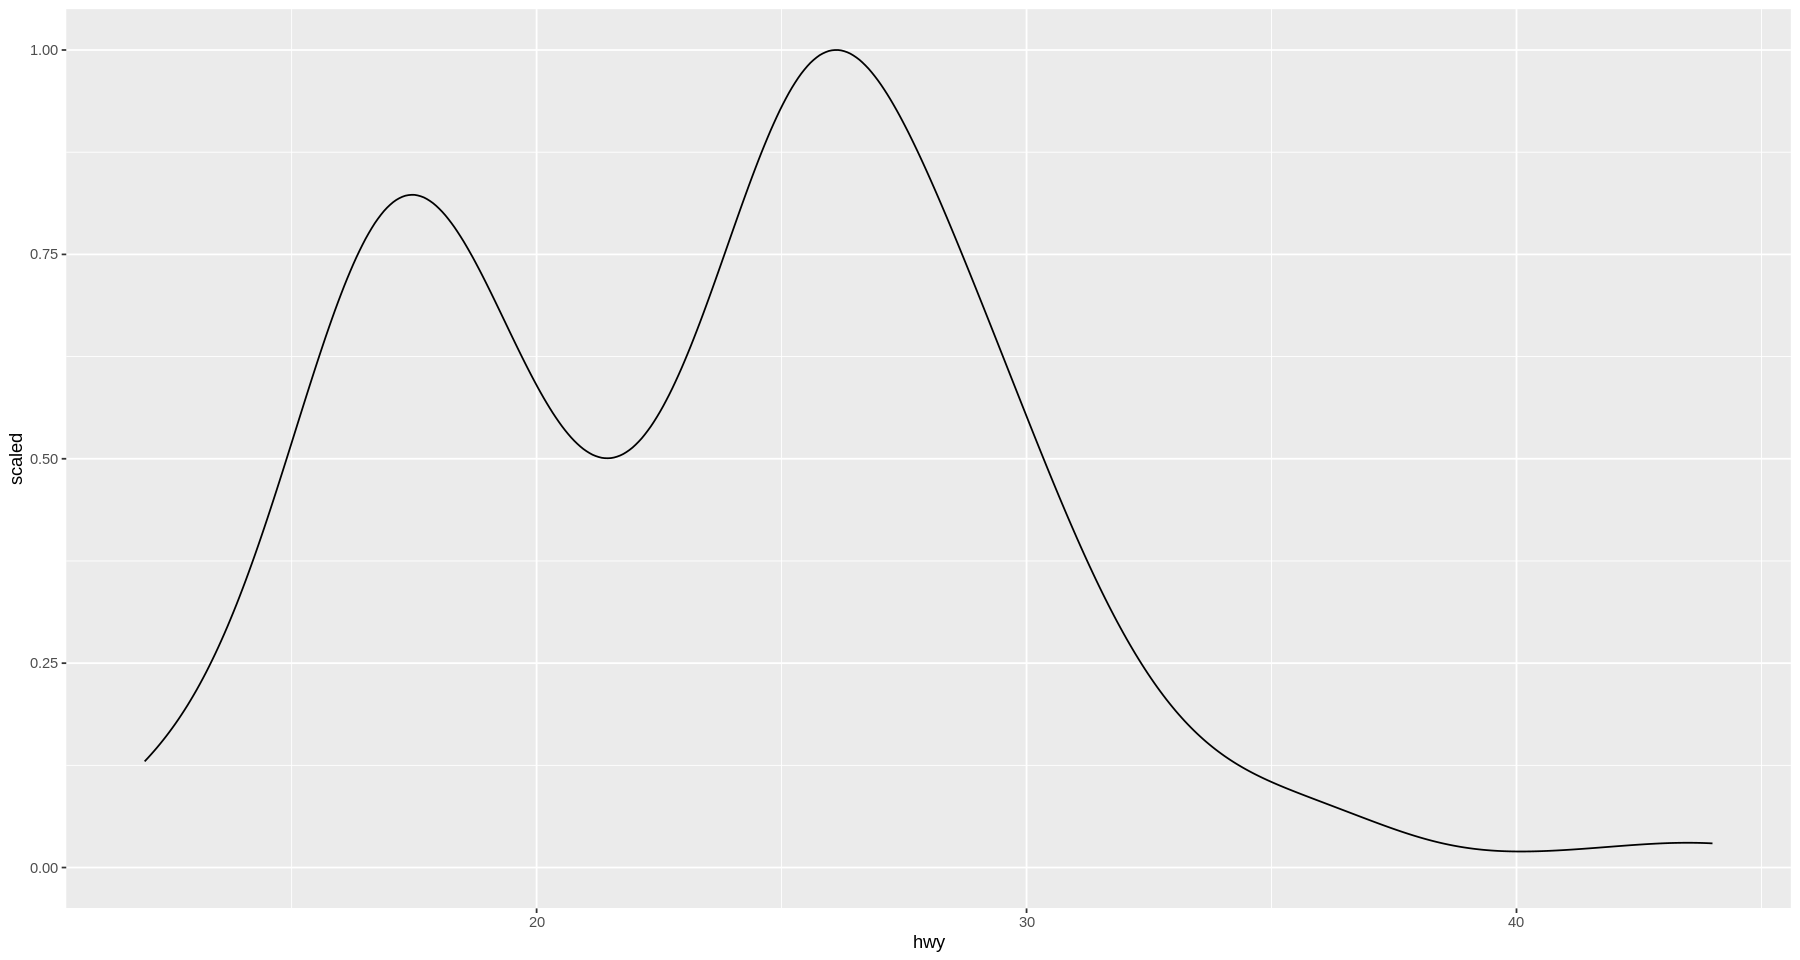

In [285]:
ggplot(mpg) +
    geom_density(aes(x = hwy, y = after_stat(scaled)))

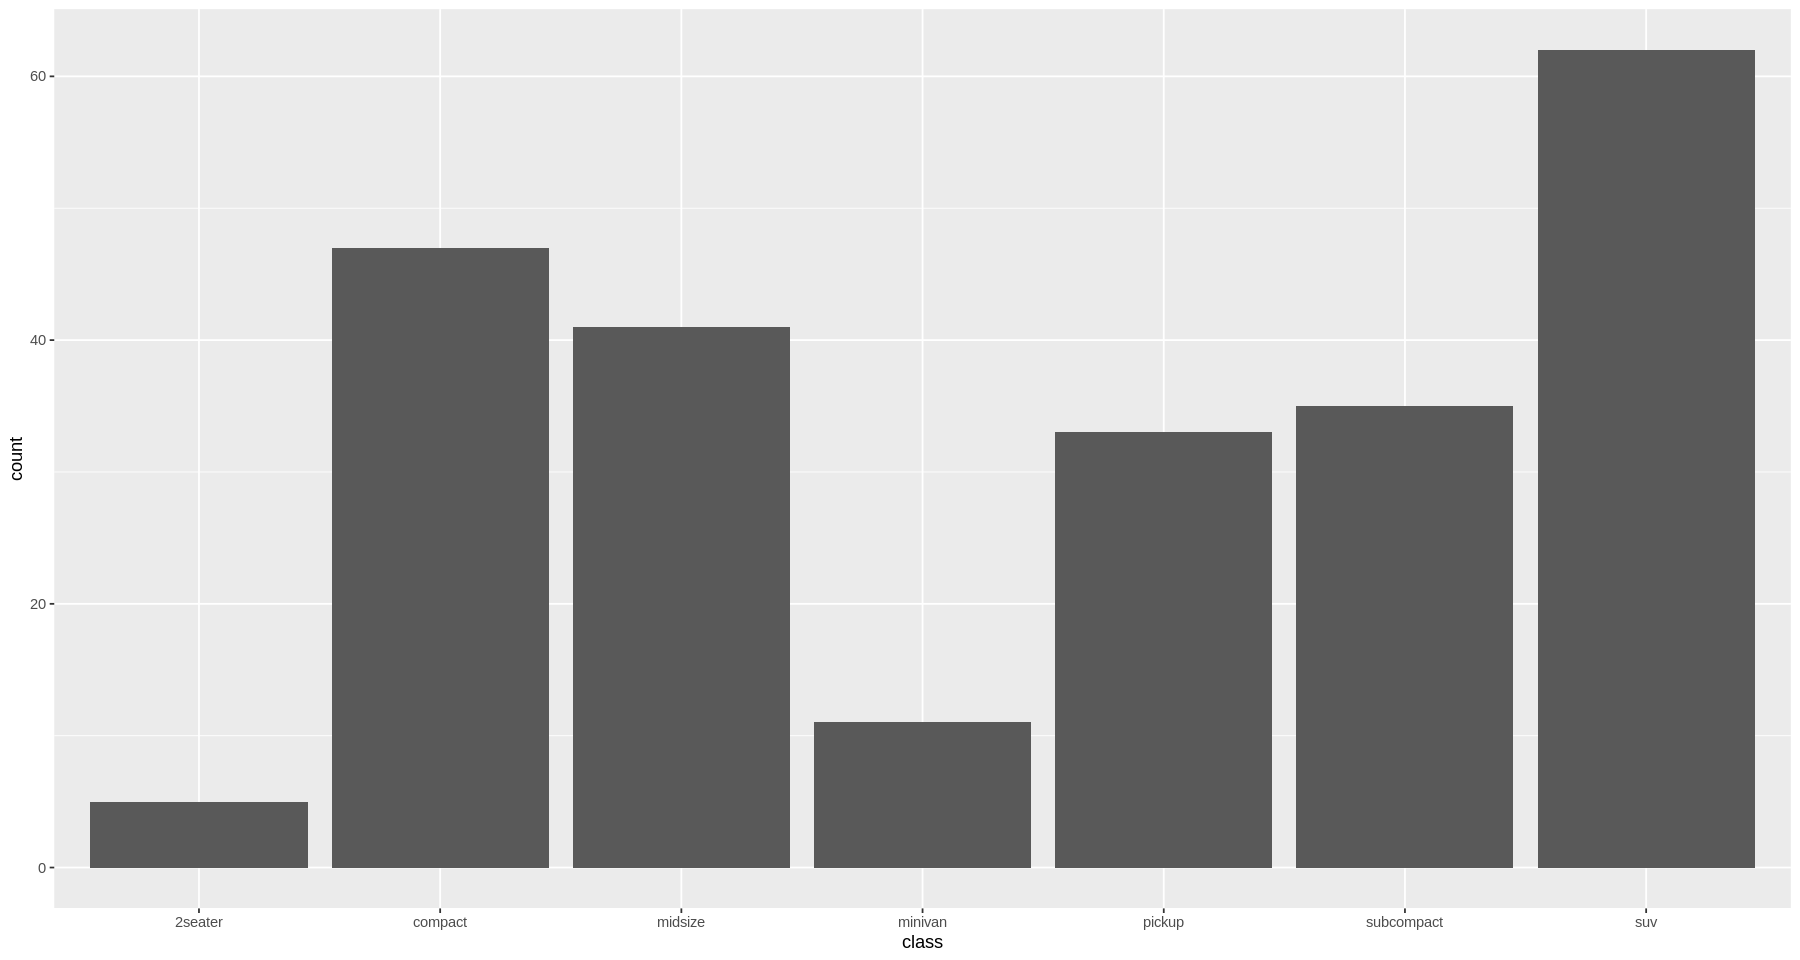

In [288]:
ggplot(mpg) + 
    stat_count(aes(x = class))

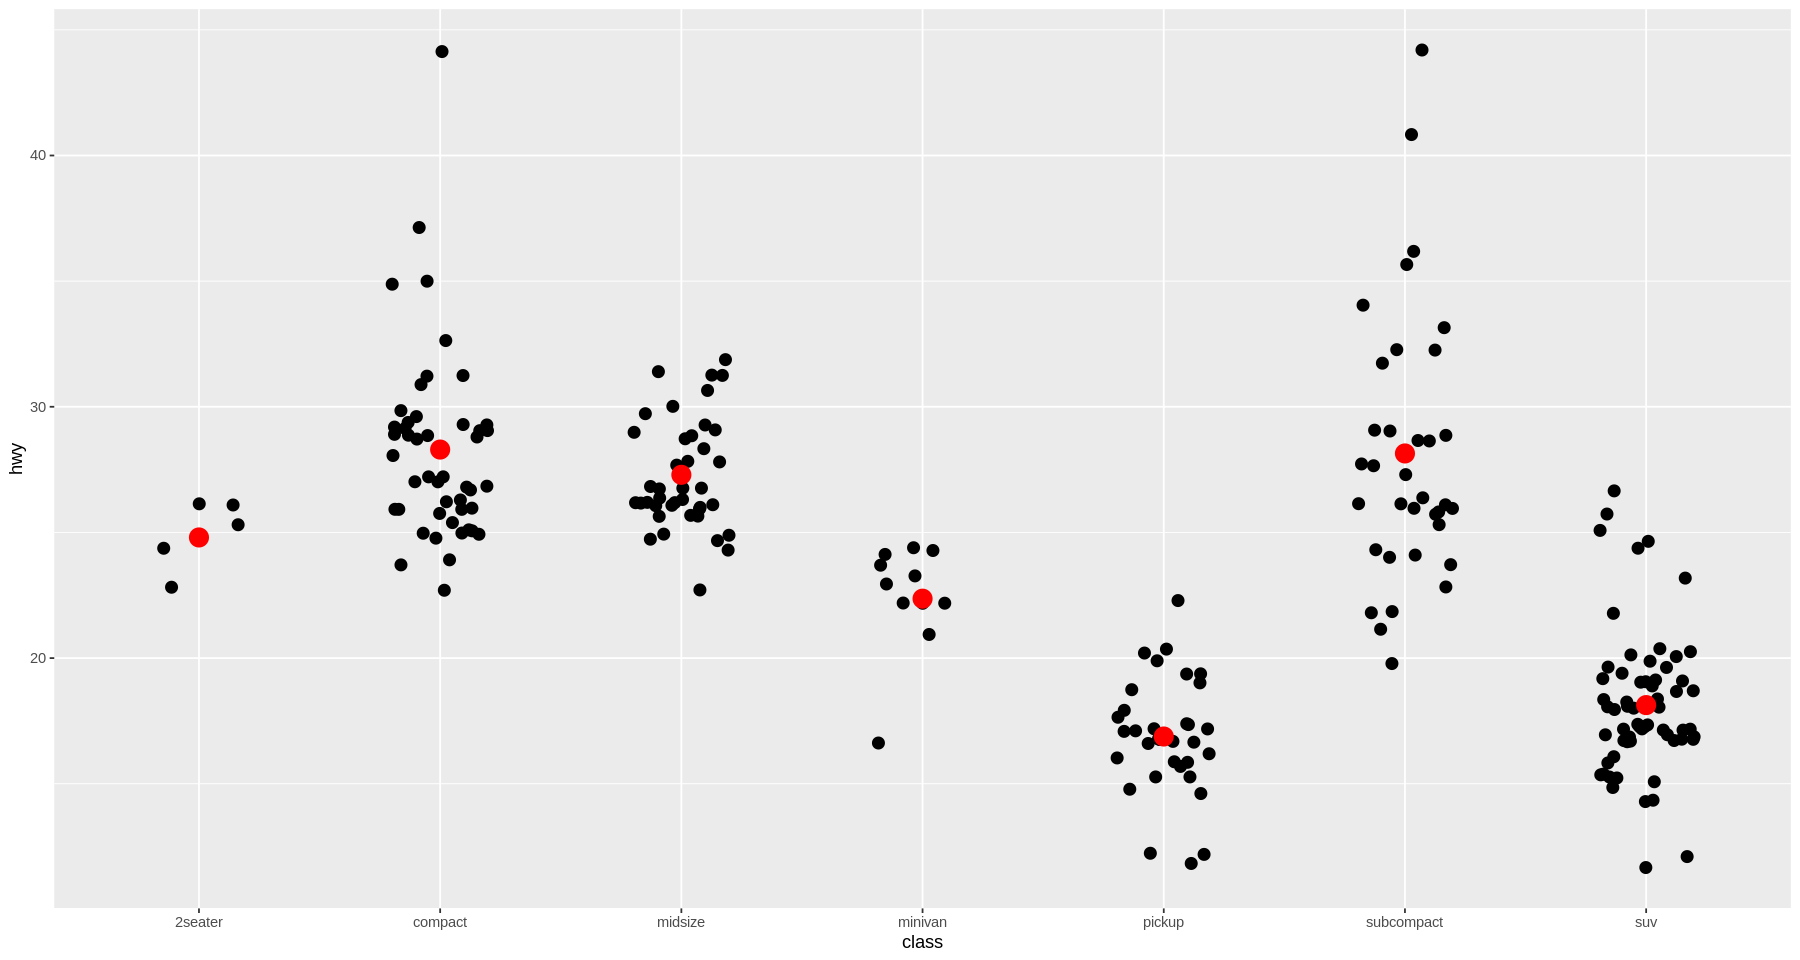

In [319]:
ggplot(mpg) + 
    geom_jitter(aes(x = class, y = hwy), size = 3, width = 0.2) +
    stat_summary(aes(x = class, y = hwy), geom = 'point', color = 'red', size = 5, fun = mean)

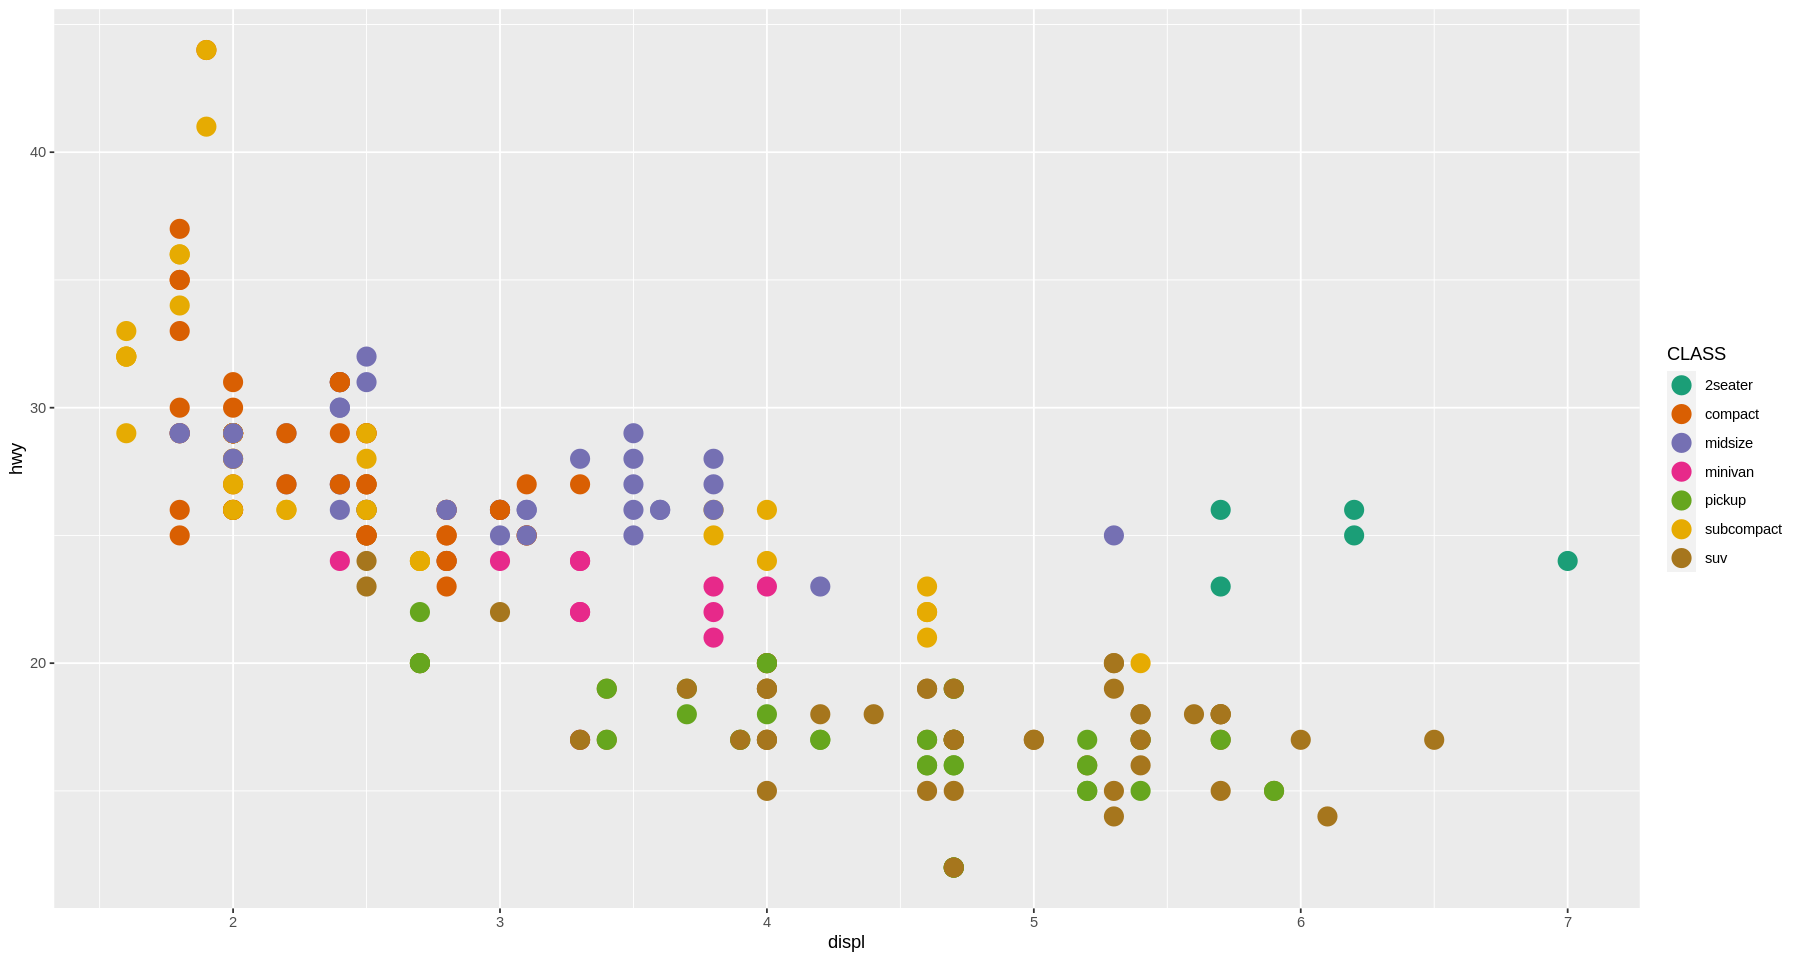

In [337]:
ggplot(mpg) + 
    geom_point(aes(x = displ, y = hwy, color = class), size = 5) +
    scale_color_brewer(type = 'qual', palette = 'Dark2', name = 'CLASS')

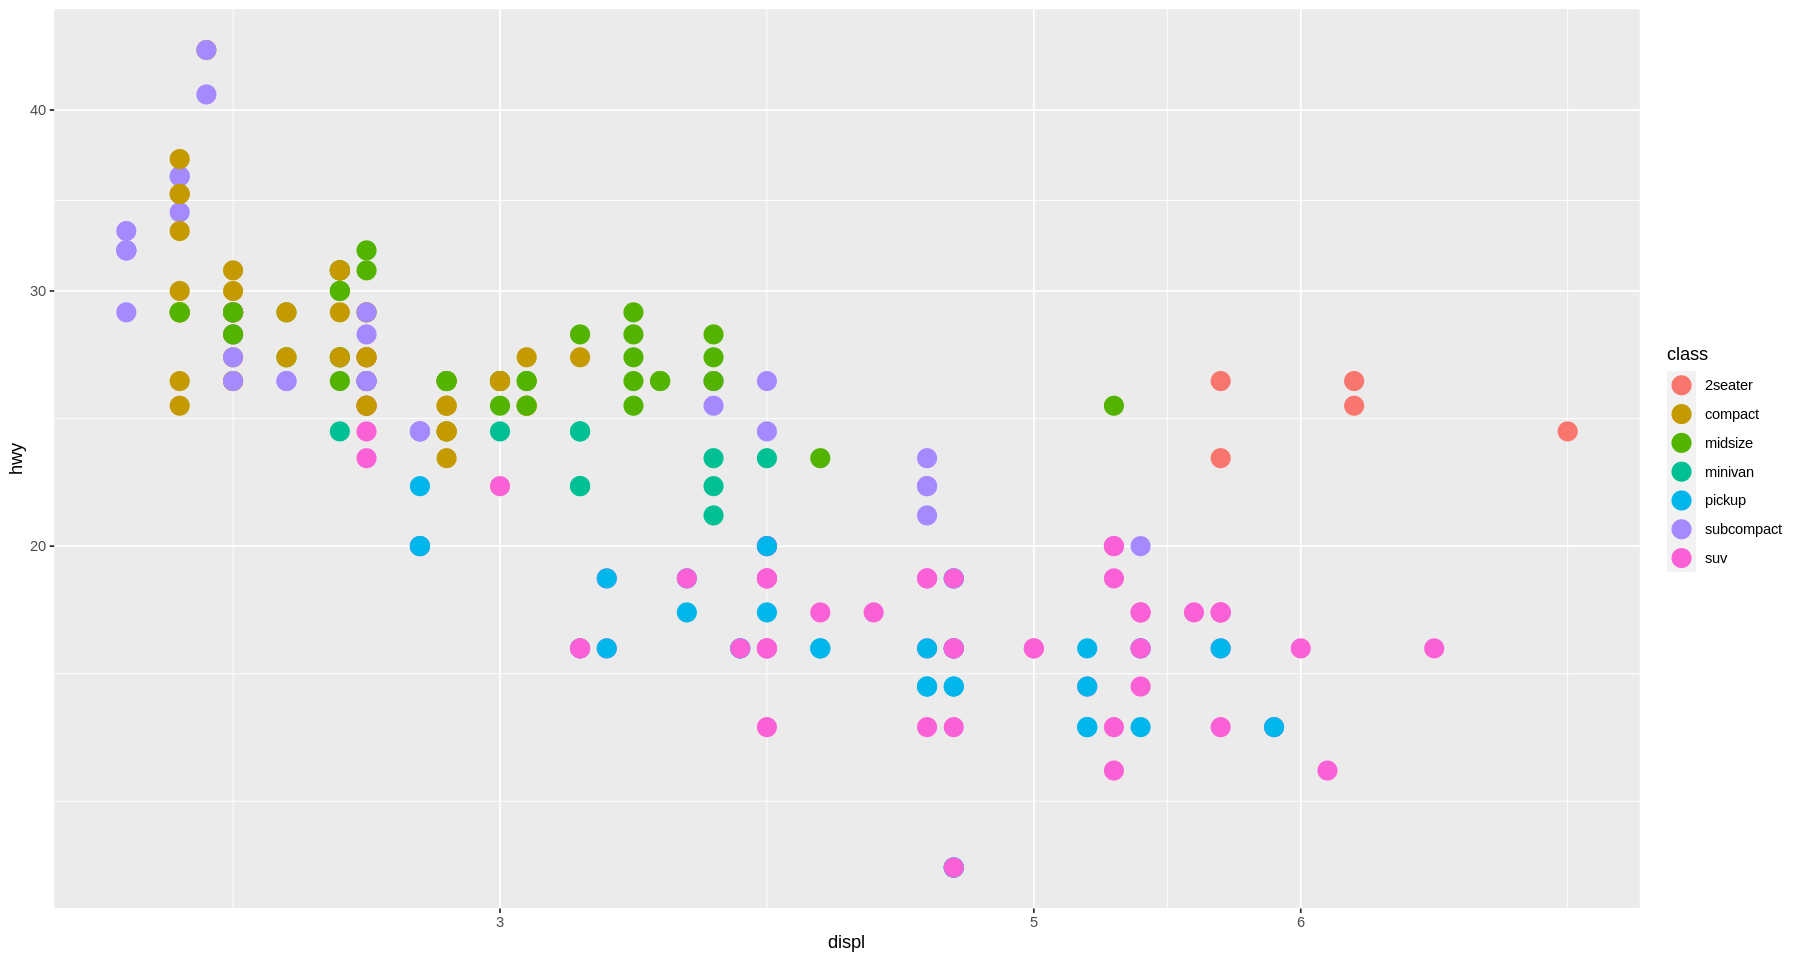

In [344]:
ggplot(mpg) + 
    geom_point(aes(x = displ, y = hwy, color = class), size = 5) +
    scale_x_continuous(breaks = c(3, 5, 6)) +
    scale_y_continuous(trans = 'log10')

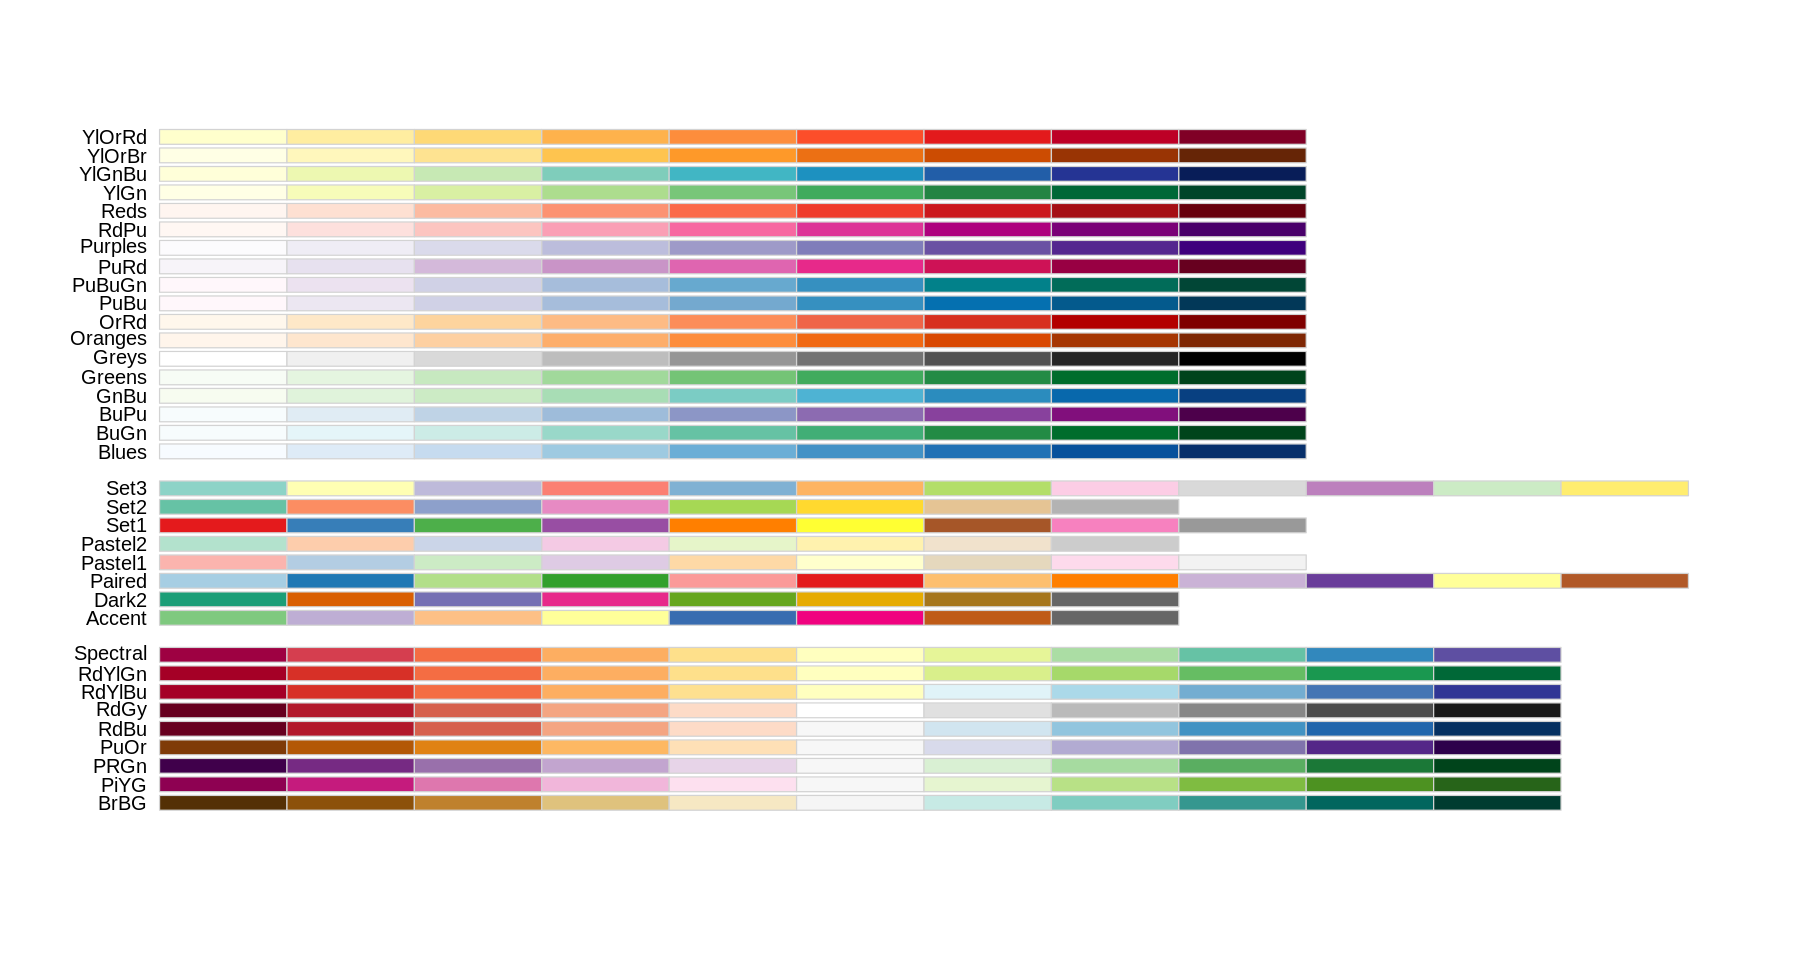

In [347]:
RColorBrewer::display.brewer.all()

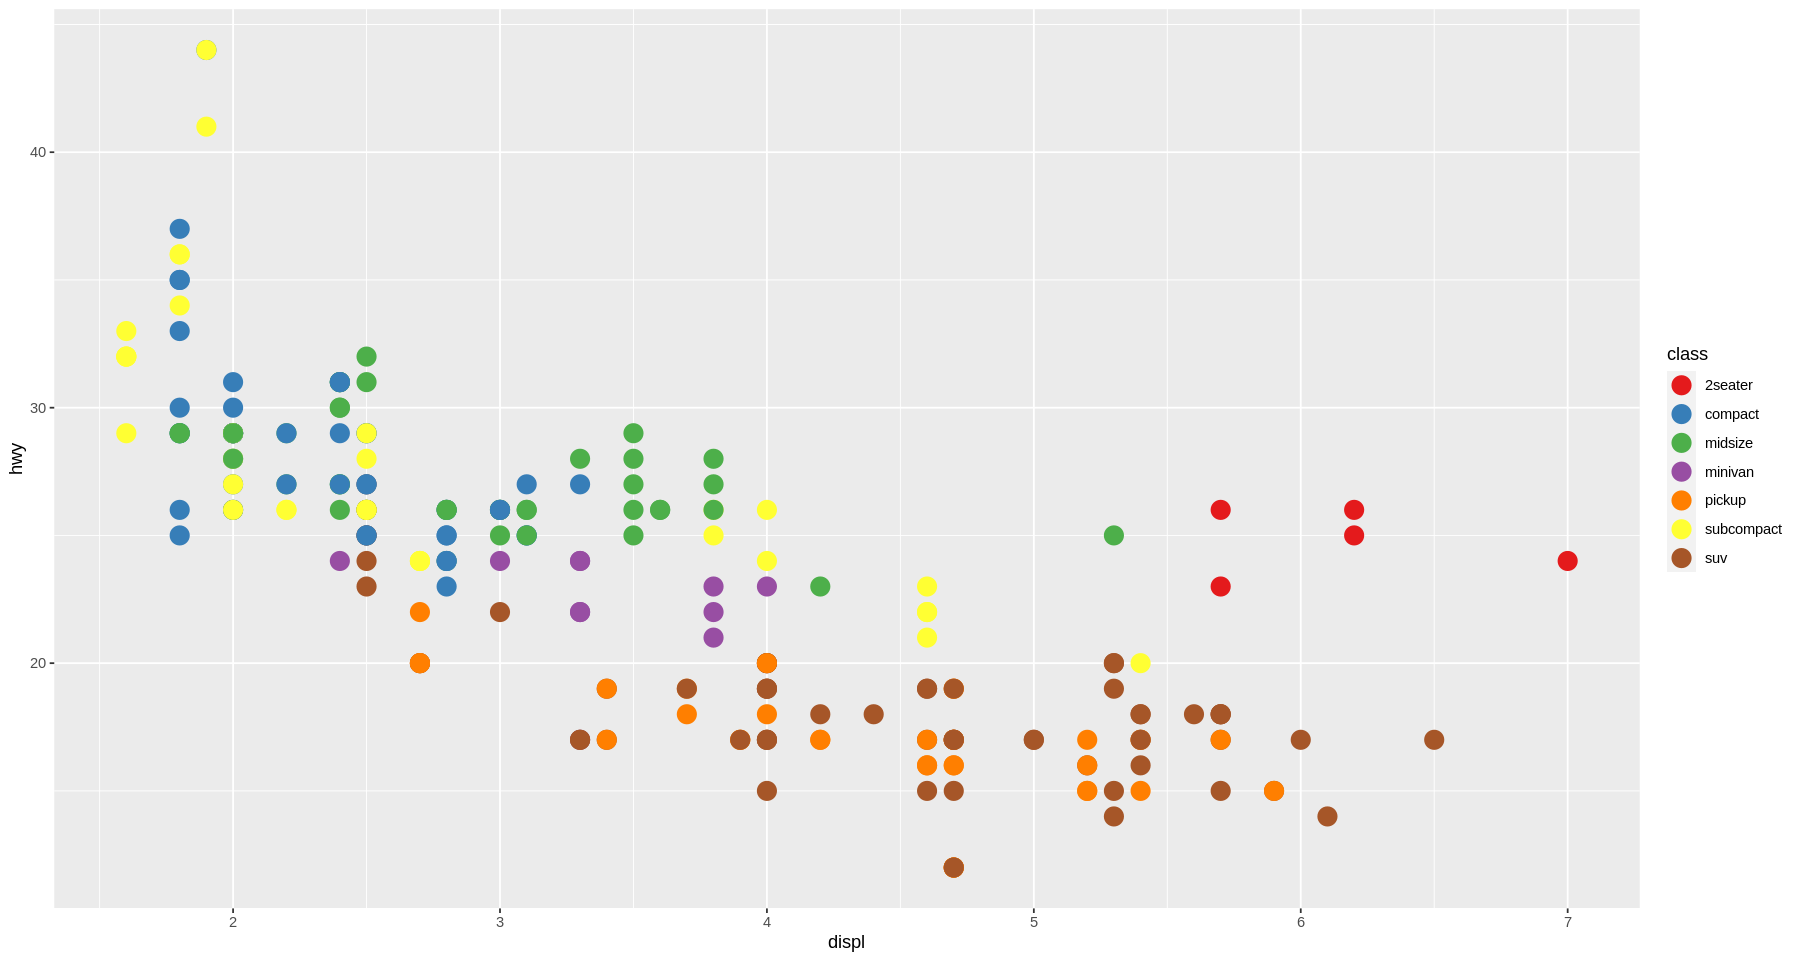

In [355]:
ggplot(mpg) +
    geom_point(aes(x = displ, y = hwy, color = class), size = 5) +
    scale_color_brewer(palette = 'Set1')

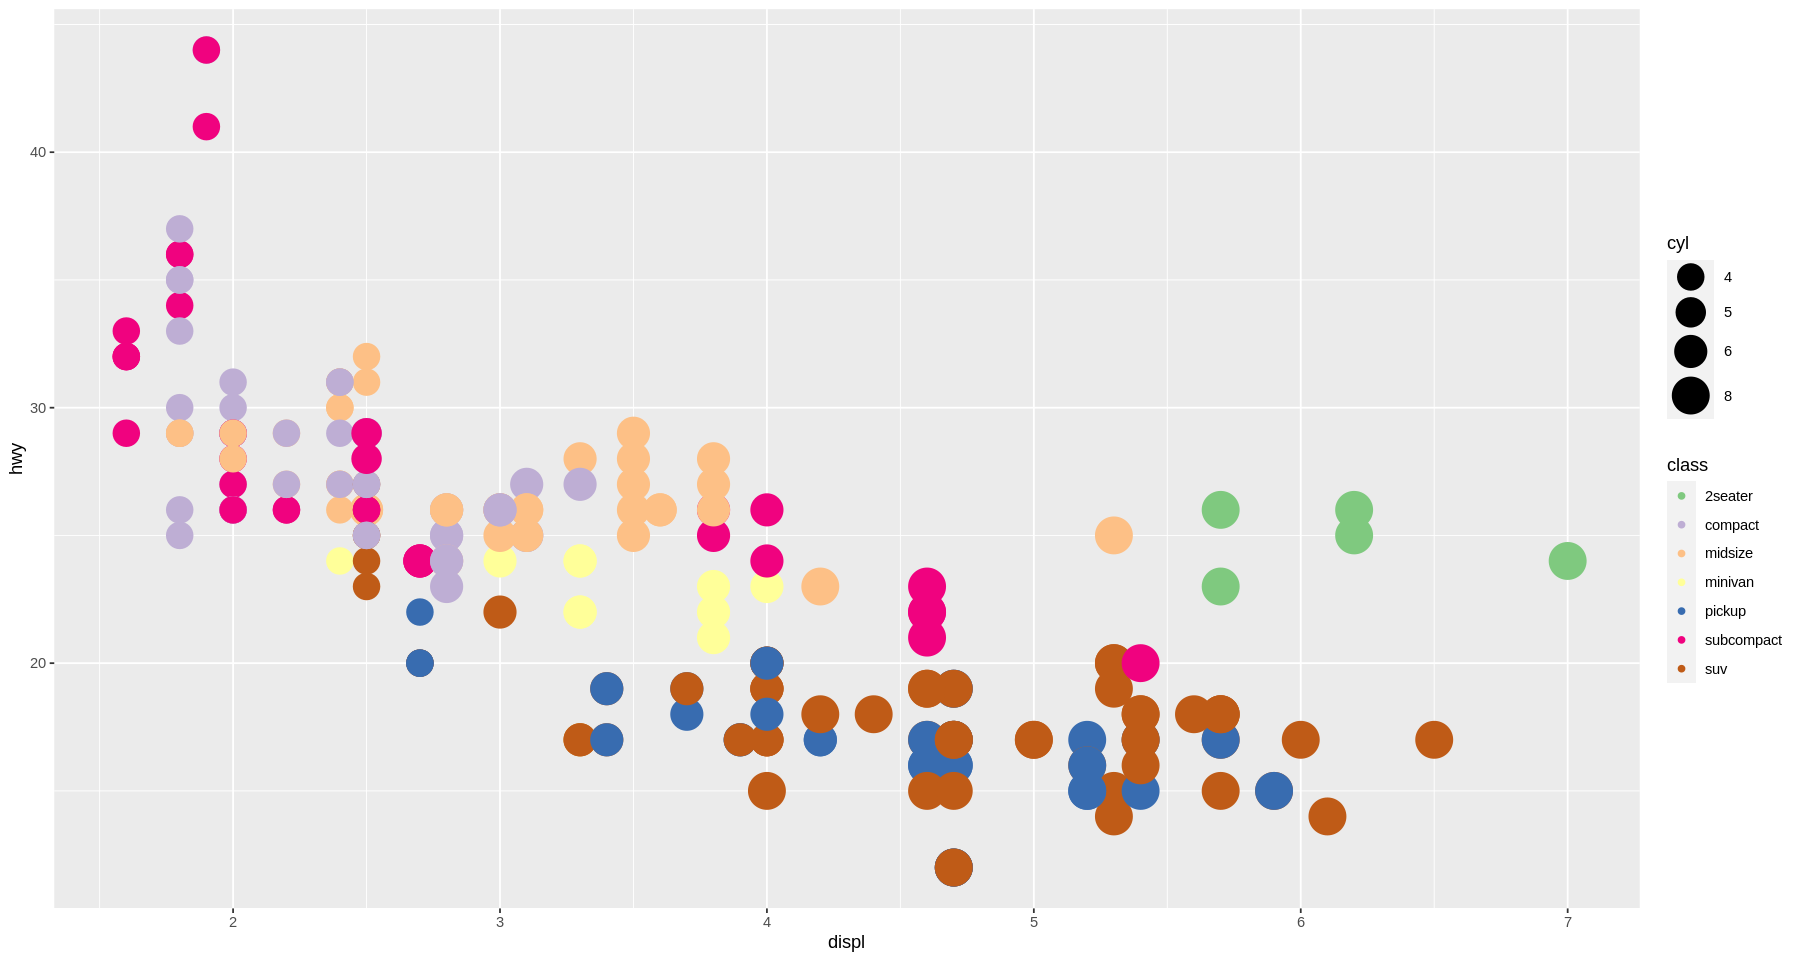

In [369]:
ggplot(mpg) +
    geom_point(aes(x = displ, y = hwy, color = class, size = cyl)) +
    scale_color_brewer(type = 'qual') +
    scale_size_area(breaks = c(4, 5, 6, 8), max_size = 10)

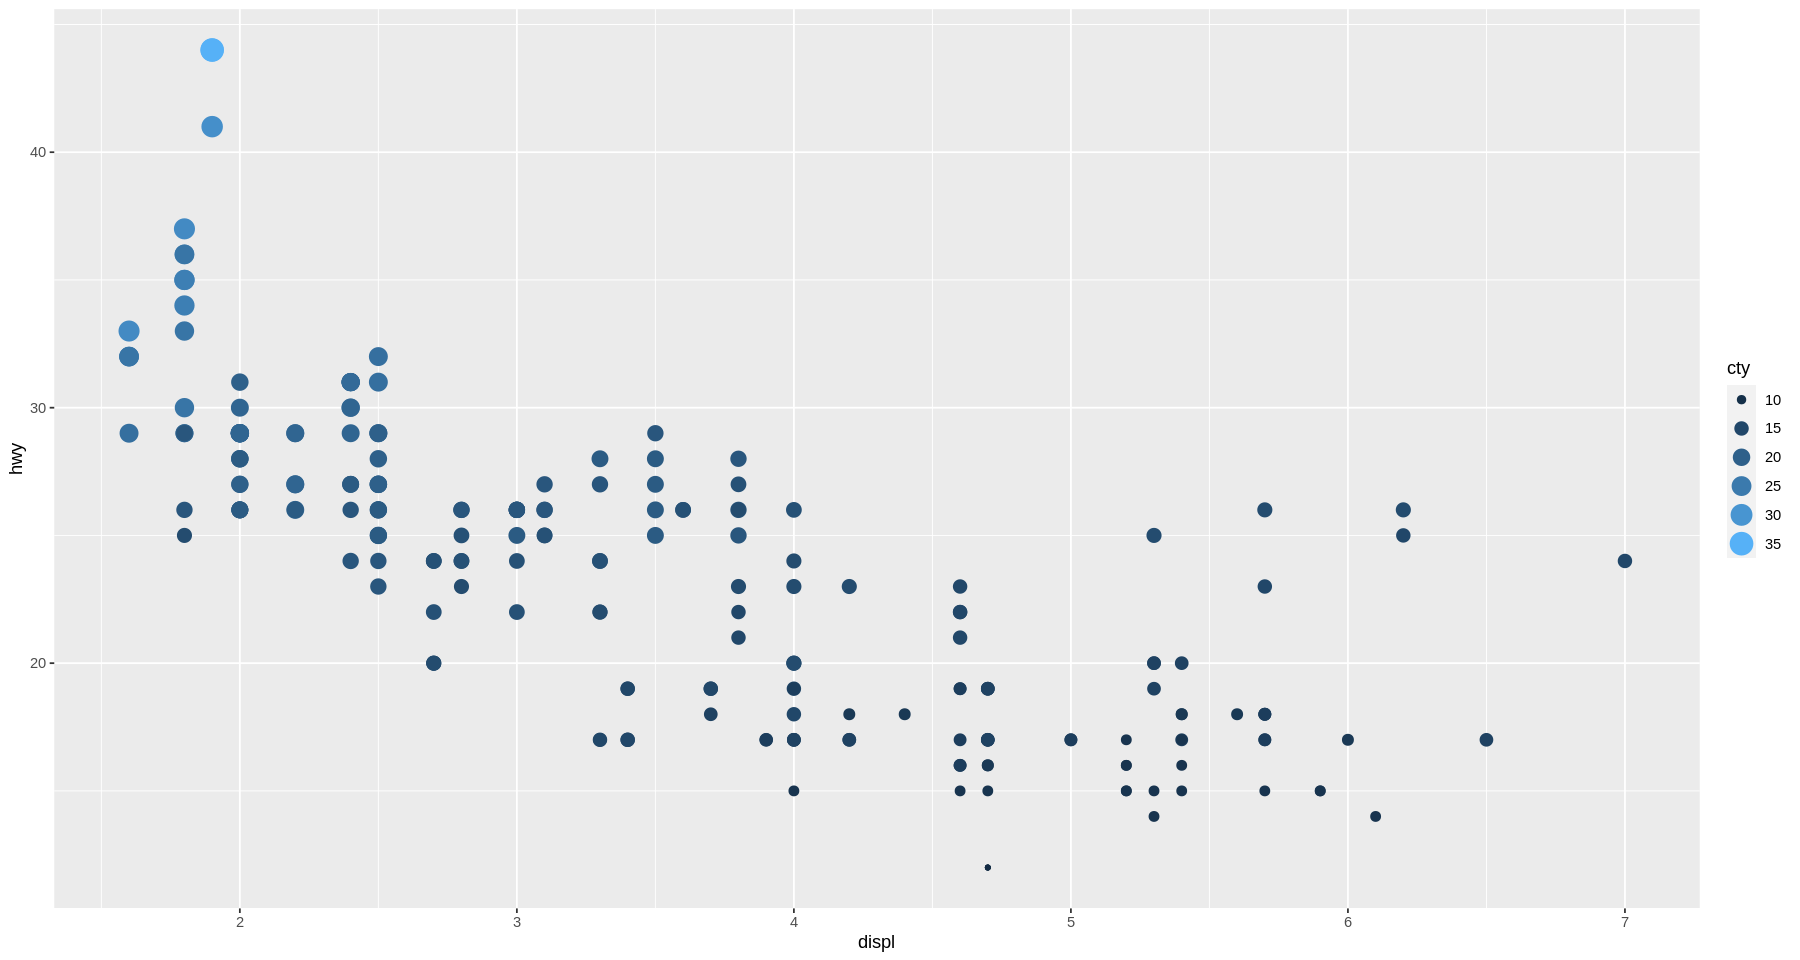

In [387]:
ggplot(mpg) +
    geom_point(aes(x = displ, y = hwy, color = cty, size = cty)) +
    guides(color = 'legend')

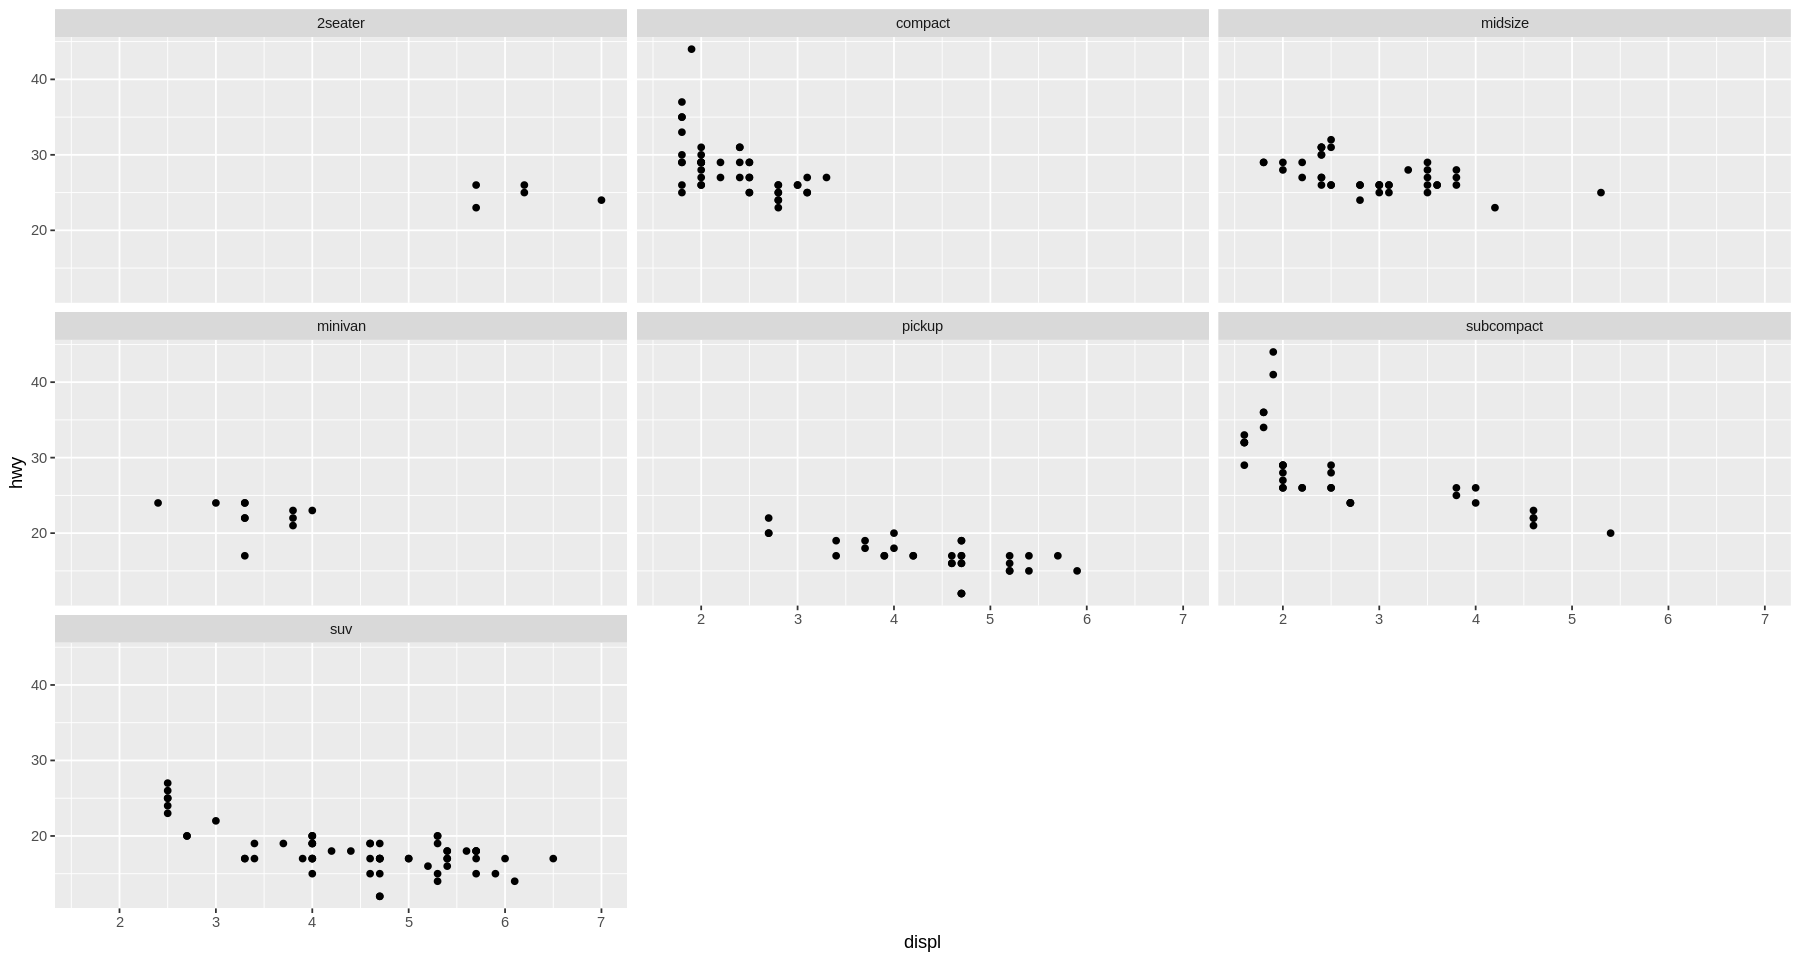

In [393]:
ggplot(mpg) + 
    geom_point(aes(x = displ, y = hwy)) +
    facet_wrap(~ class)

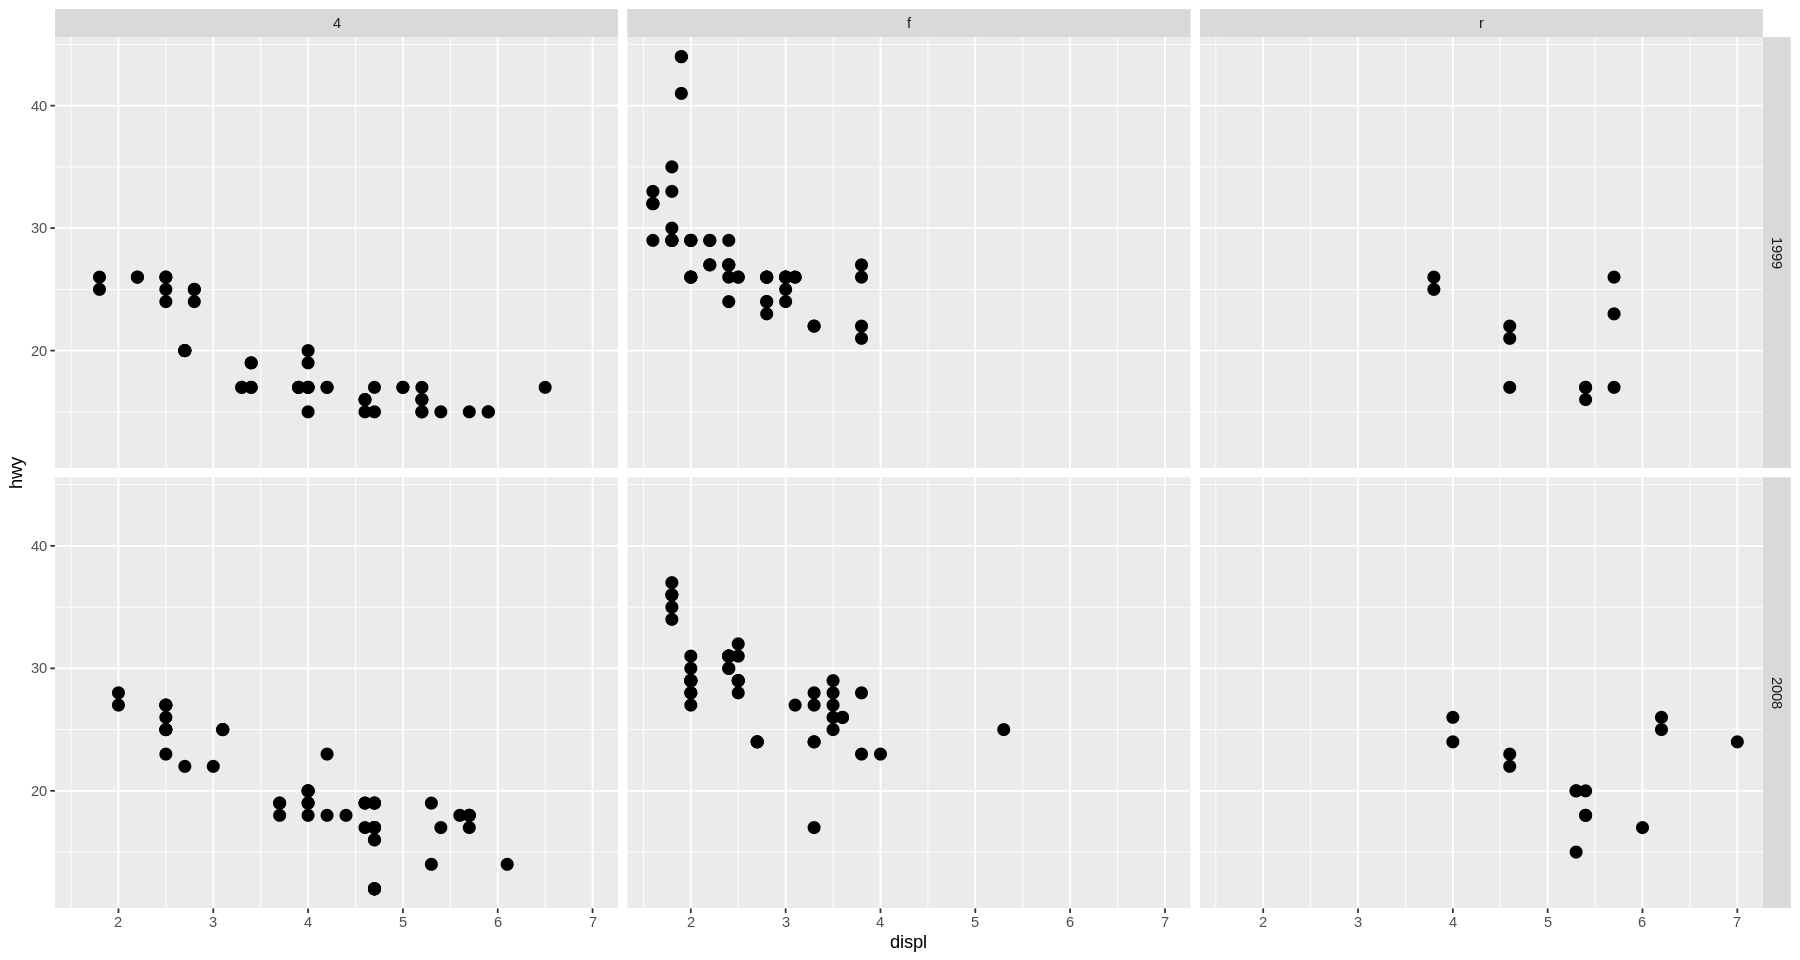

In [398]:
ggplot(mpg) + 
    geom_point(aes(x = displ, y = hwy), size = 3) +
    facet_grid(year ~ drv)

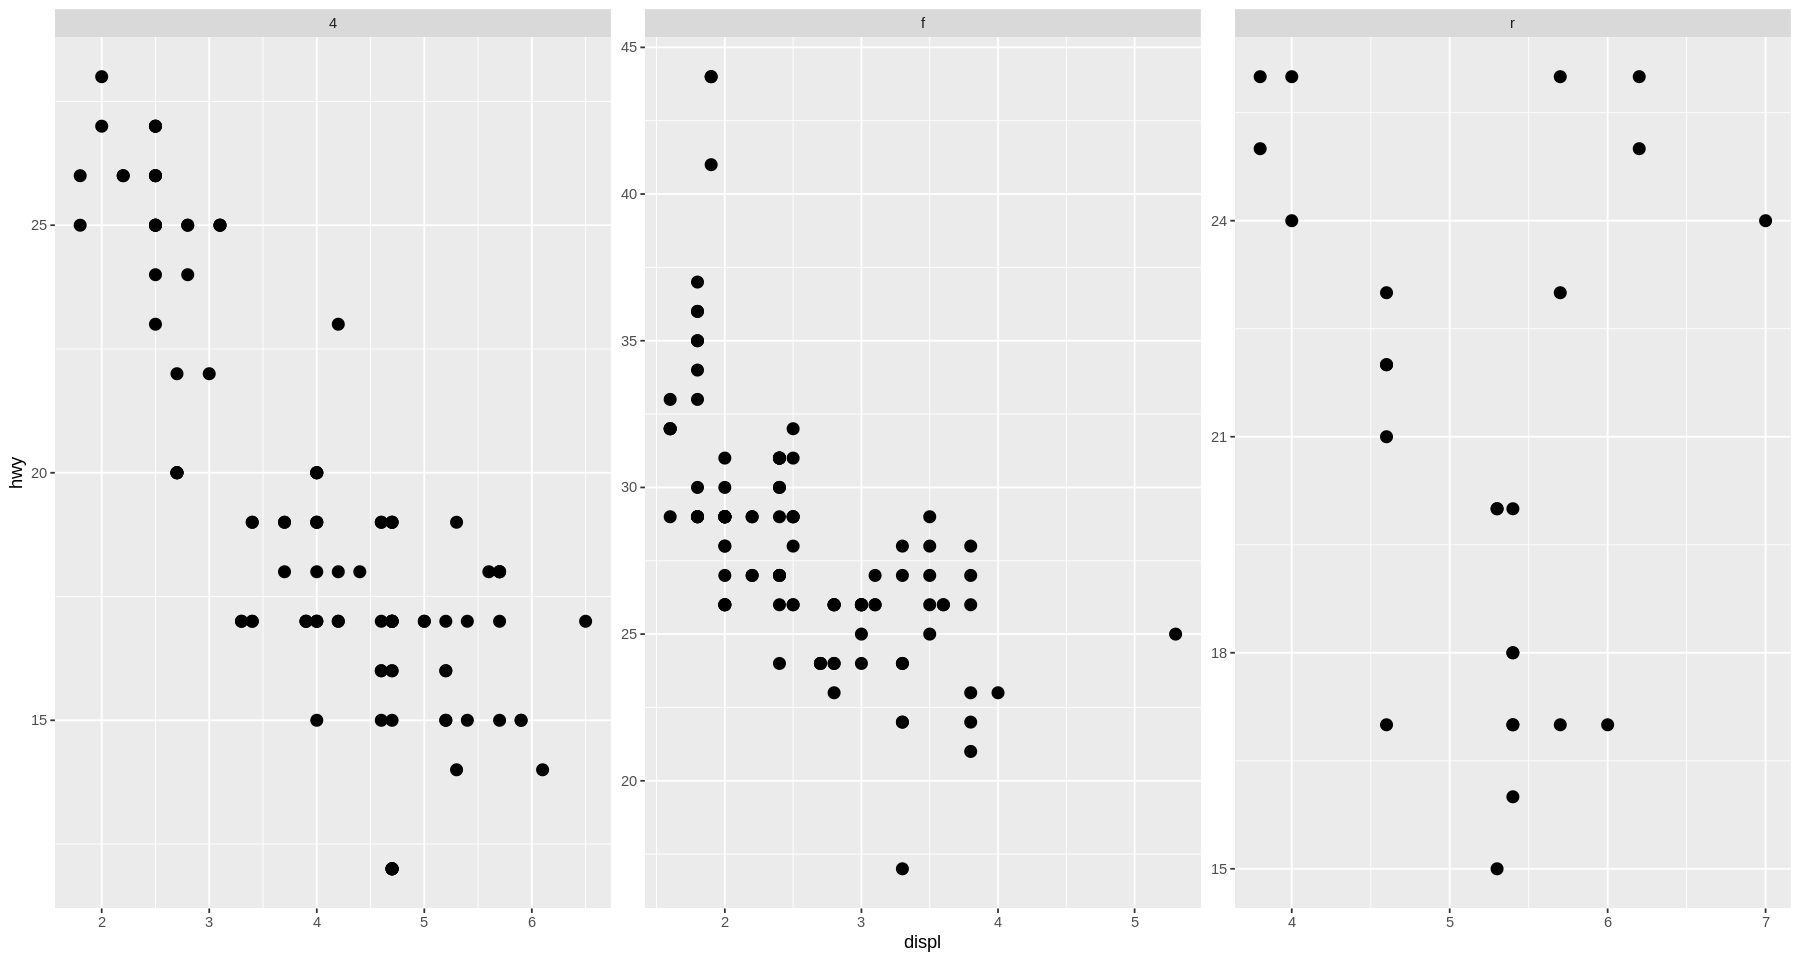

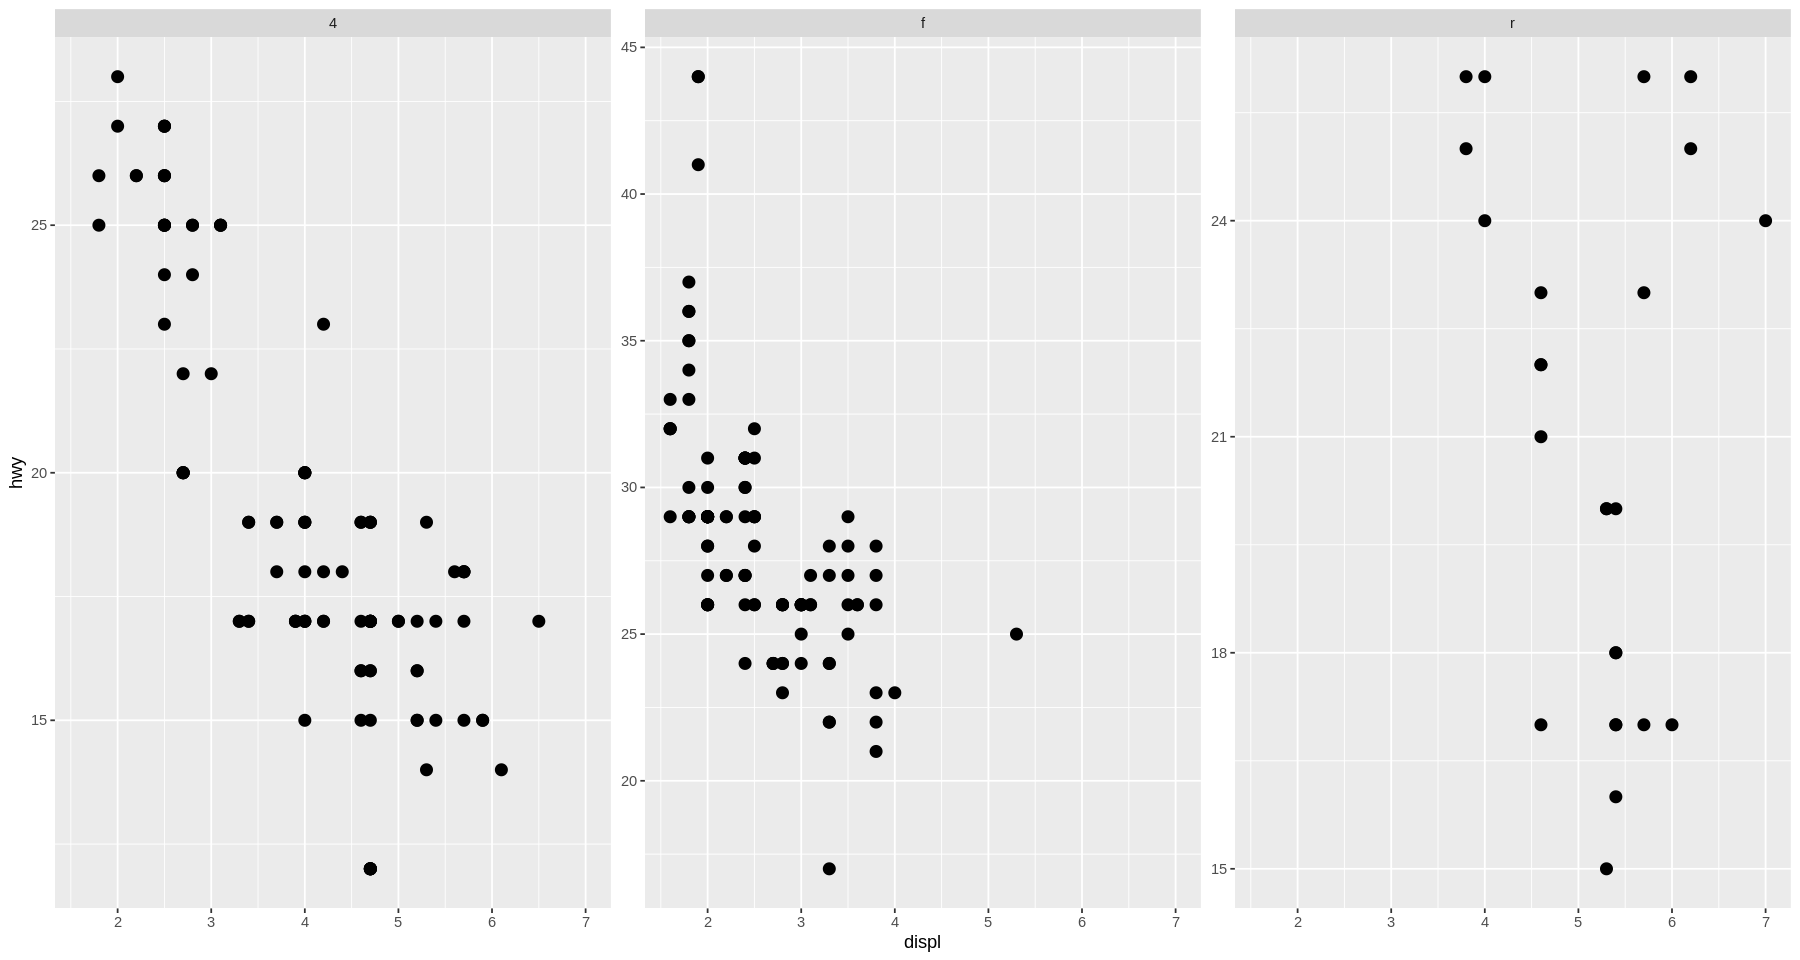

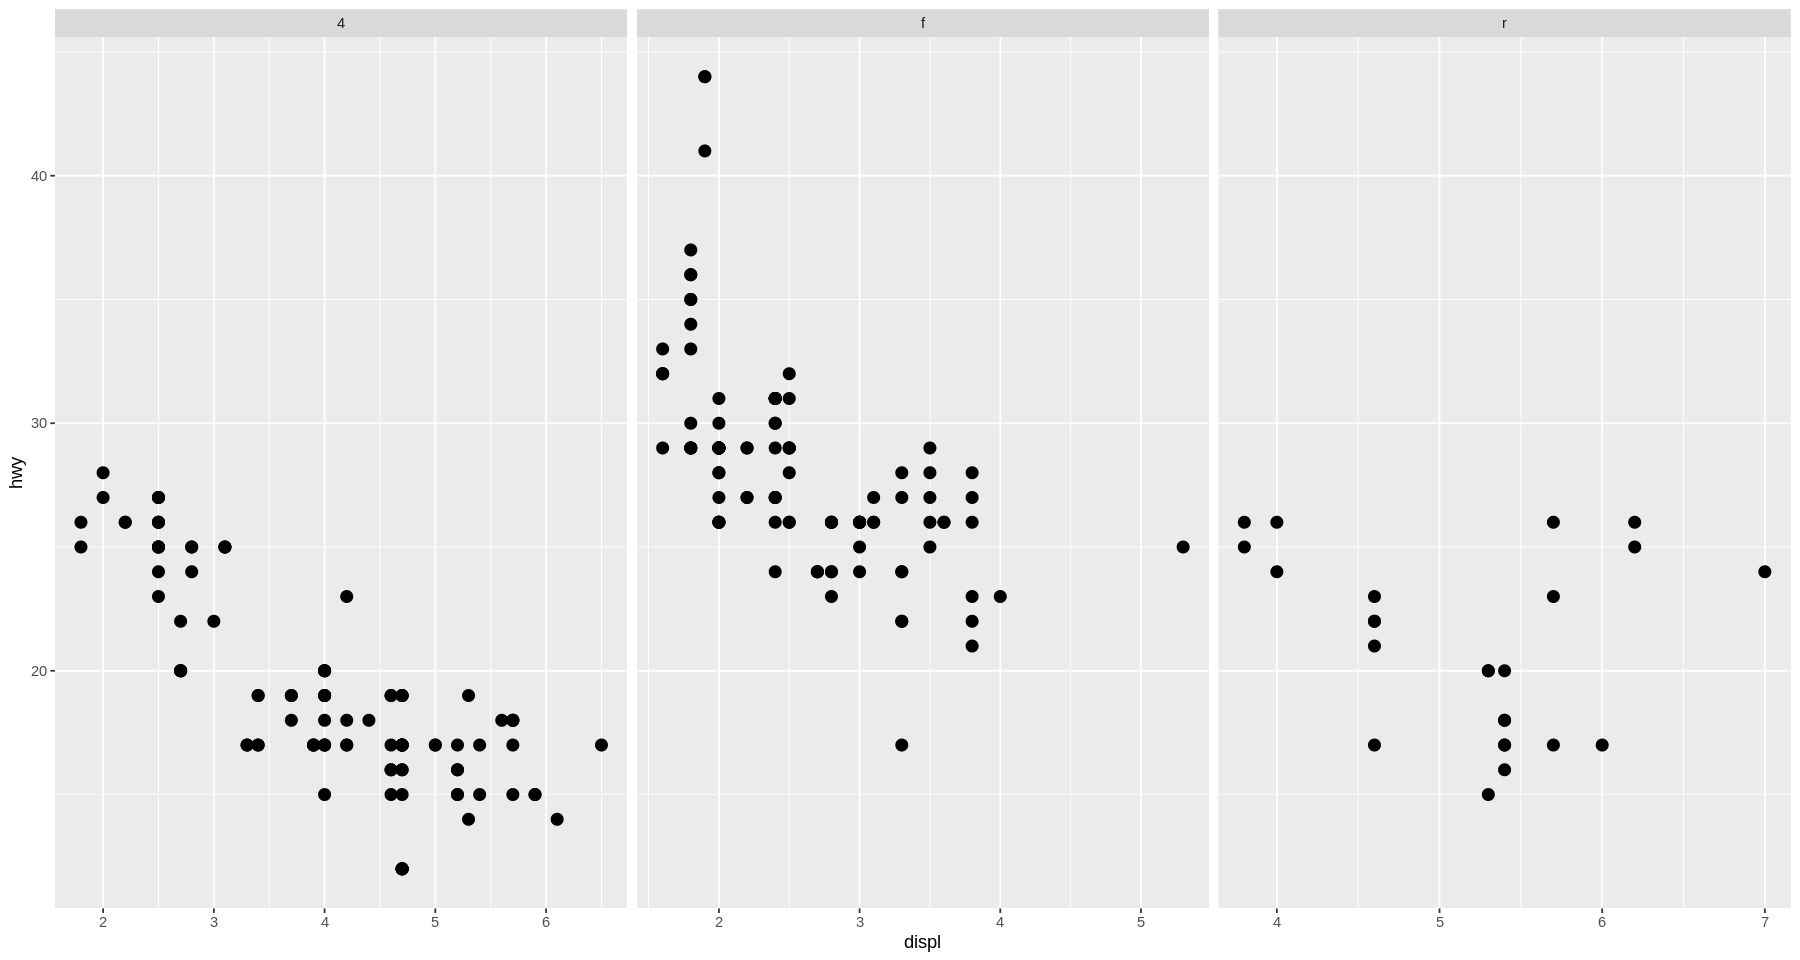

In [404]:
ggplot(mpg) + 
    geom_point(aes(x = displ, y = hwy), size = 3) +
    facet_wrap(~ drv, scale = 'free')

ggplot(mpg) + 
    geom_point(aes(x = displ, y = hwy), size = 3) +
    facet_wrap(~ drv, scale = 'free_y')

ggplot(mpg) + 
    geom_point(aes(x = displ, y = hwy), size = 3) +
    facet_wrap(~ drv, scale = 'free_x')

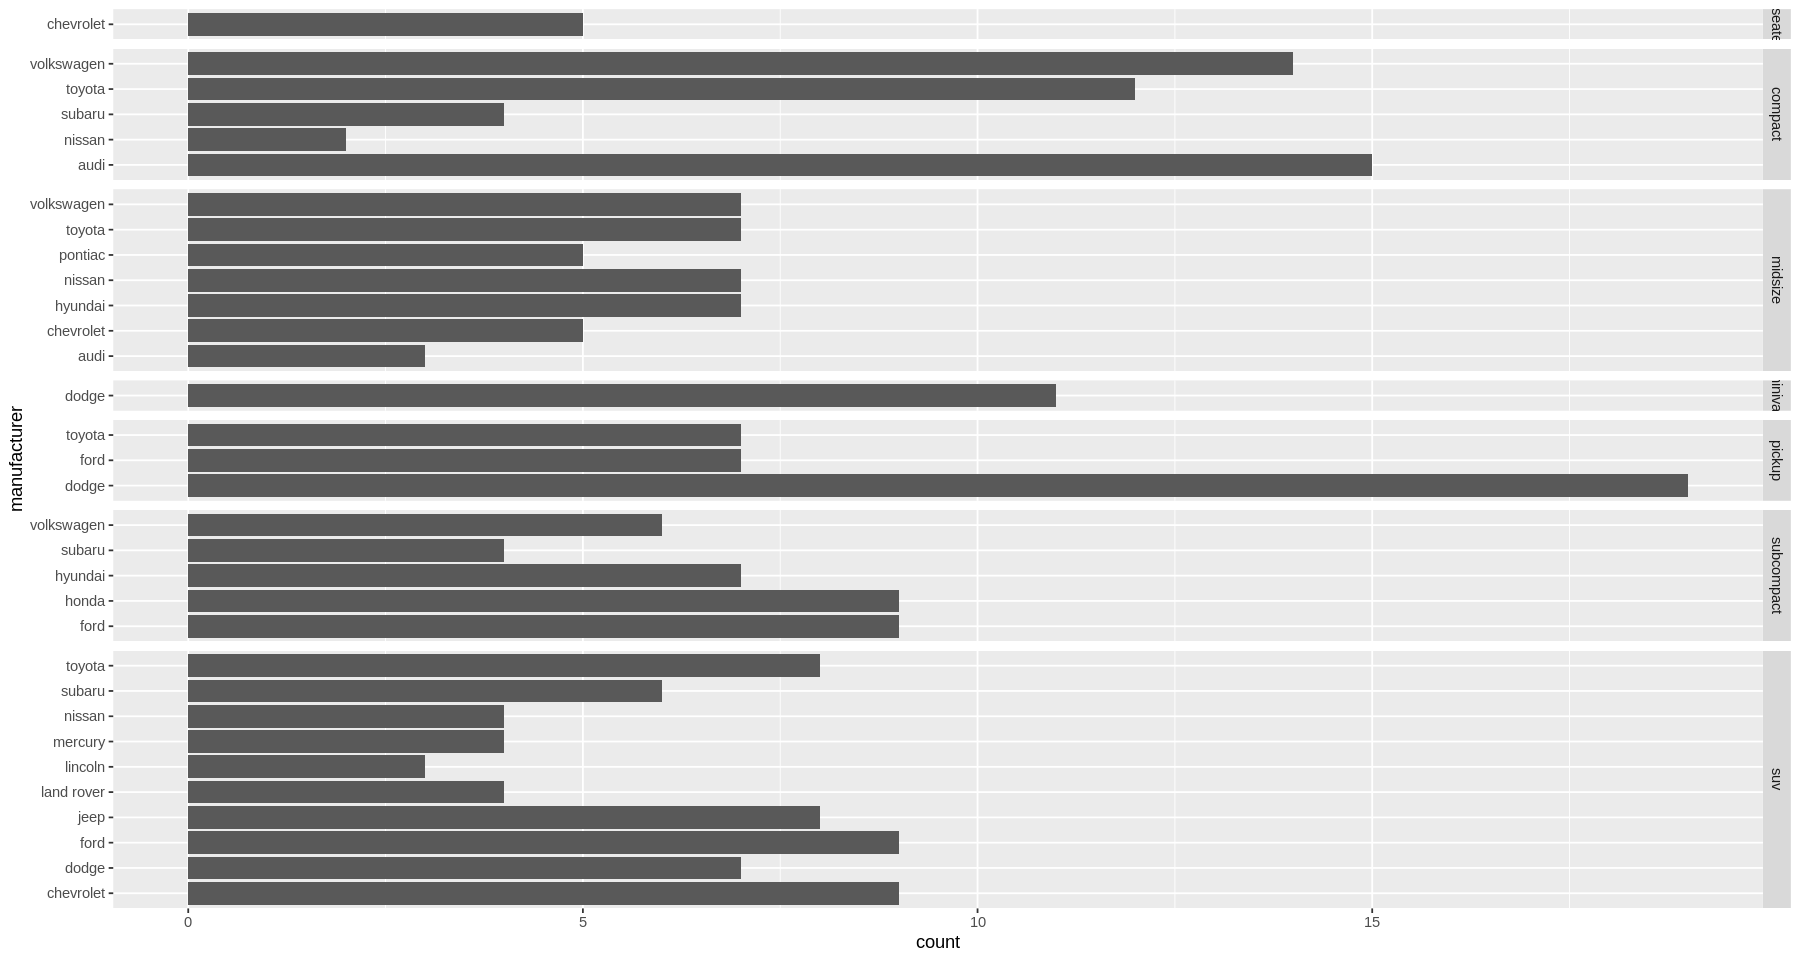

In [415]:
ggplot(mpg) +
    geom_bar(aes(y = manufacturer)) +
    facet_grid(class ~ ., space = 'free_y', scales = 'free_y')

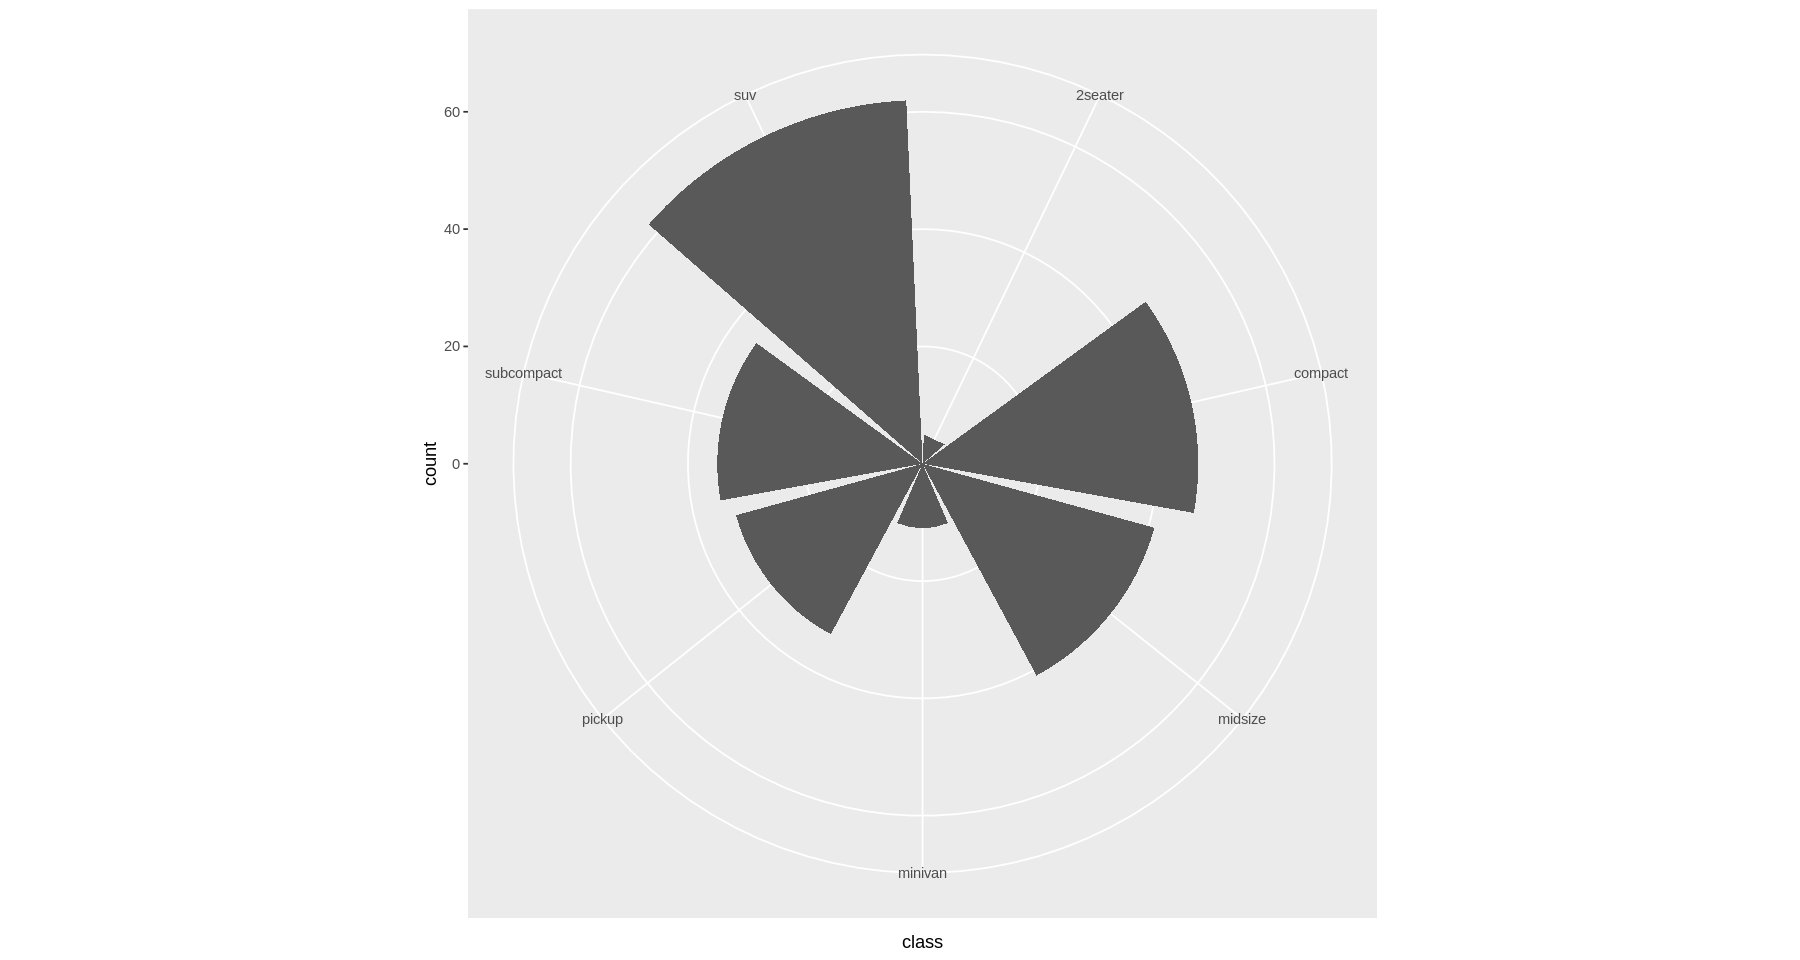

In [420]:
ggplot(mpg) +
    geom_bar(aes(x = class)) +
    coord_polar()

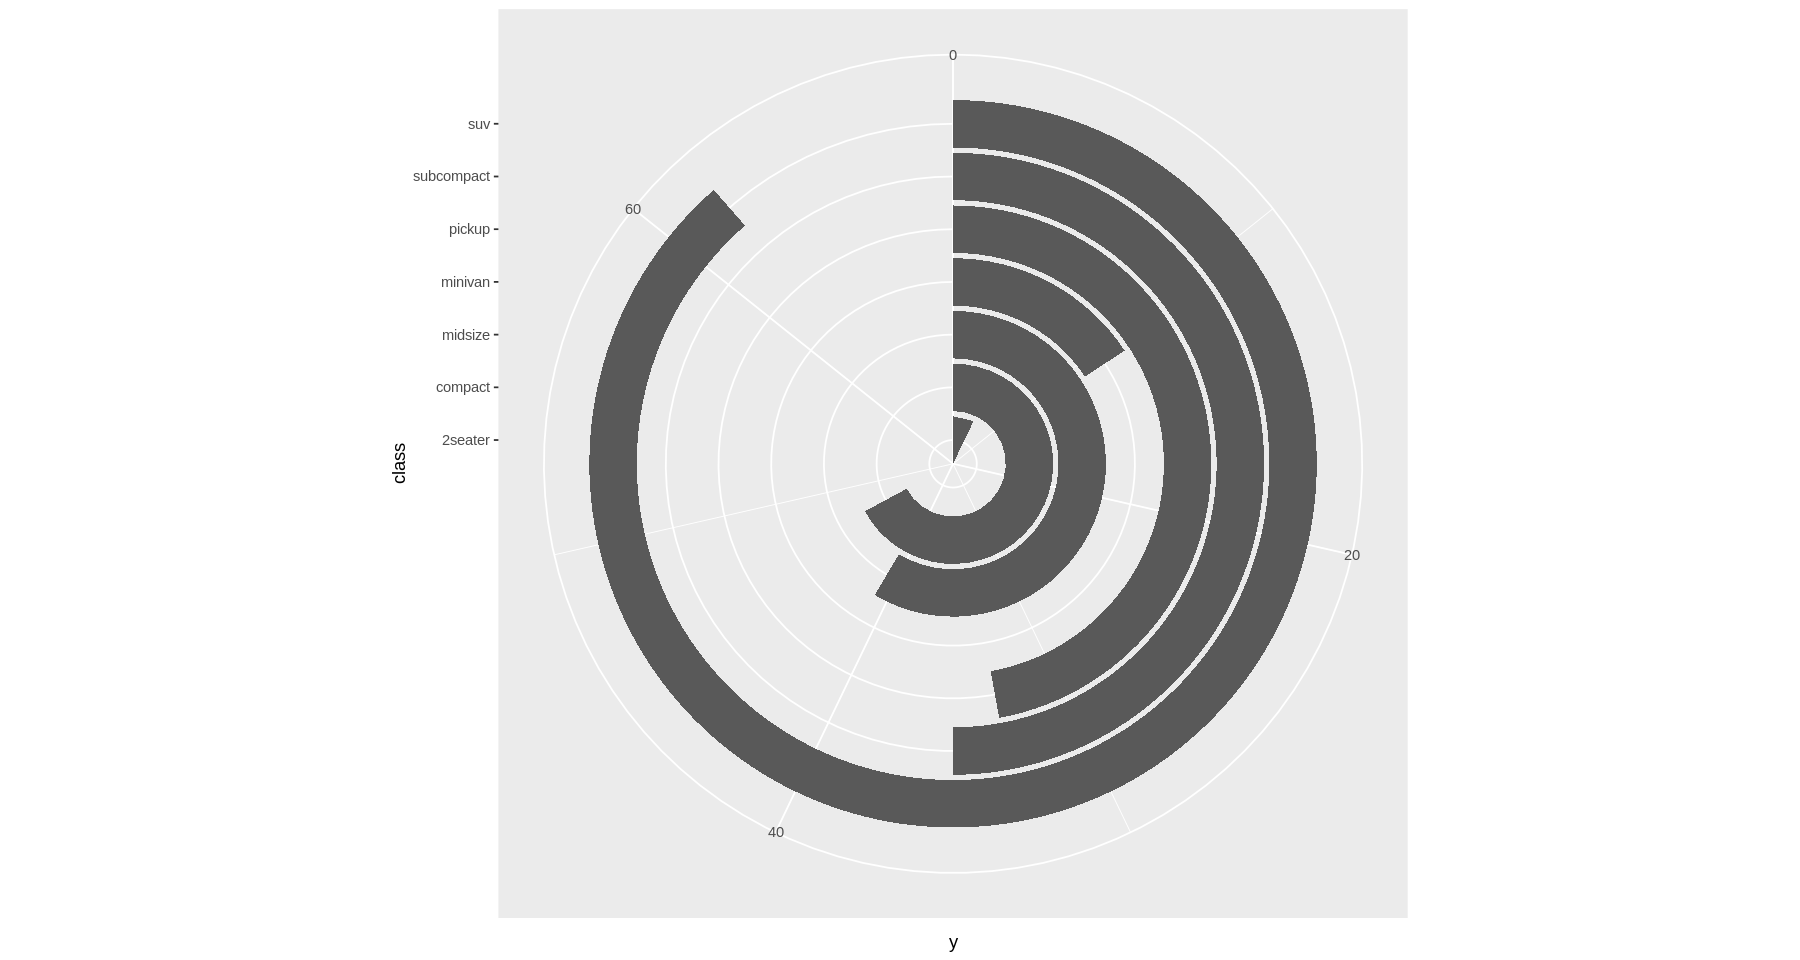

In [422]:
ggplot(mpg) +
    geom_bar(aes(x = class)) +
    coord_polar(theta = 'y') +
    expand_limits(y = 70)

Warning message:
“Removed 3 rows containing missing values (`geom_bar()`).”


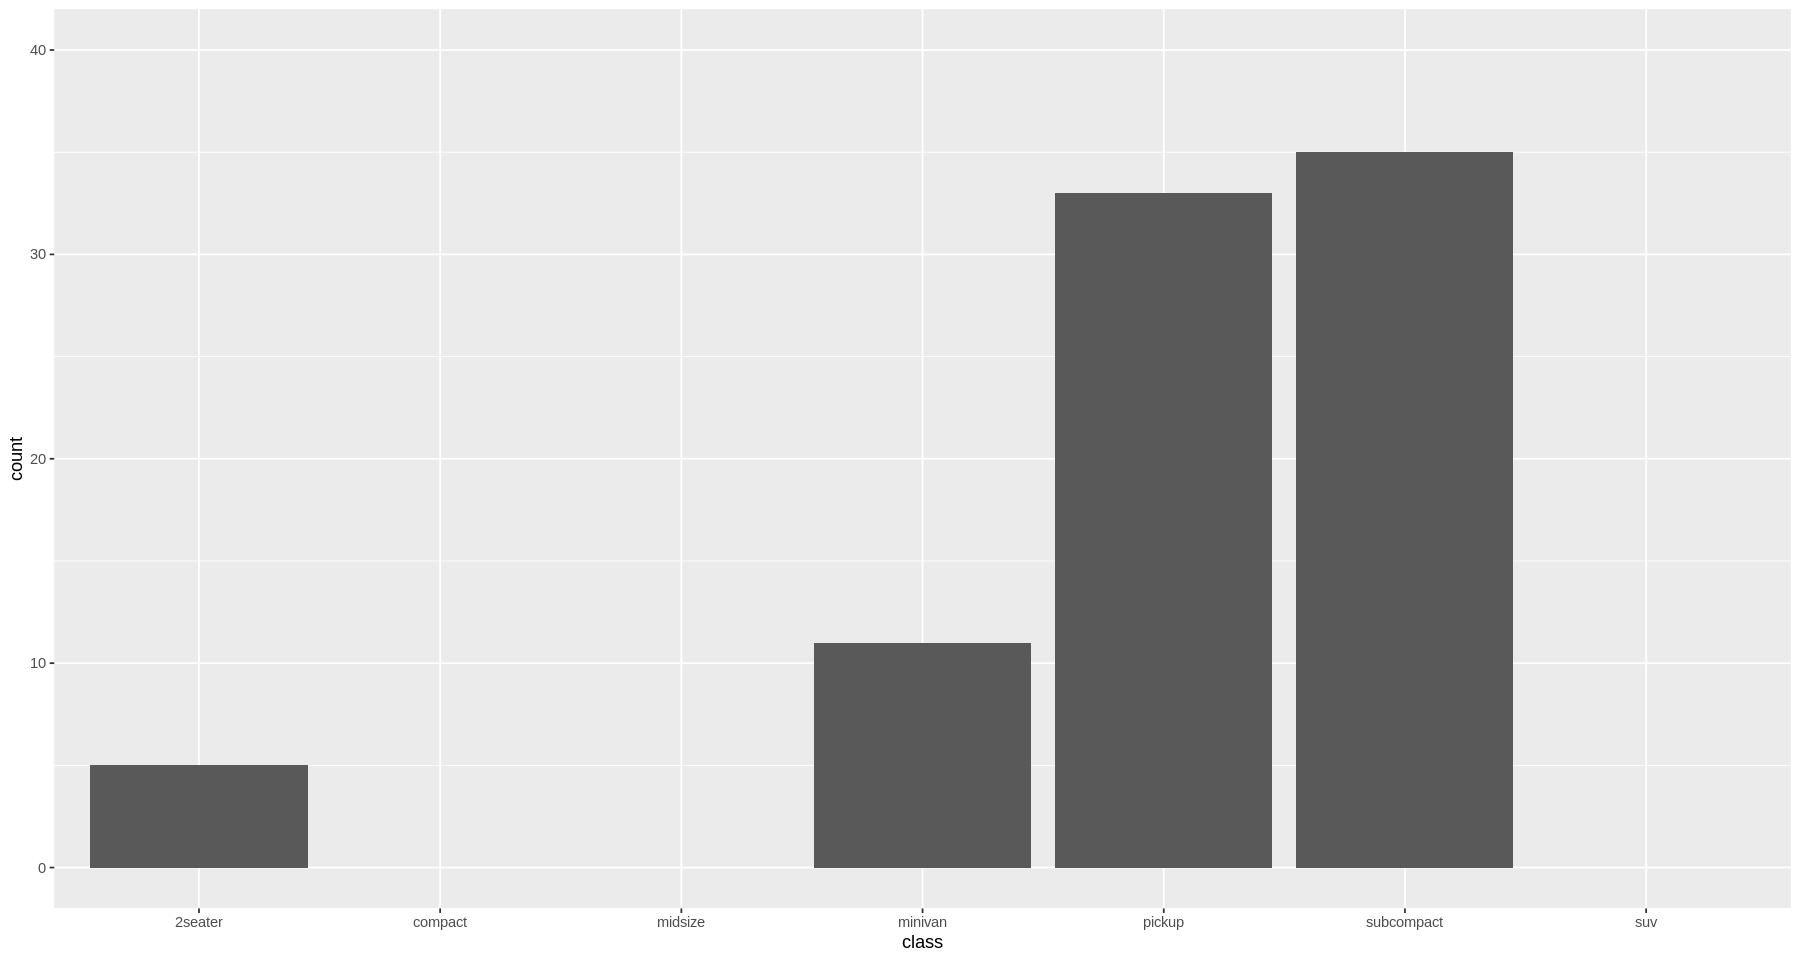

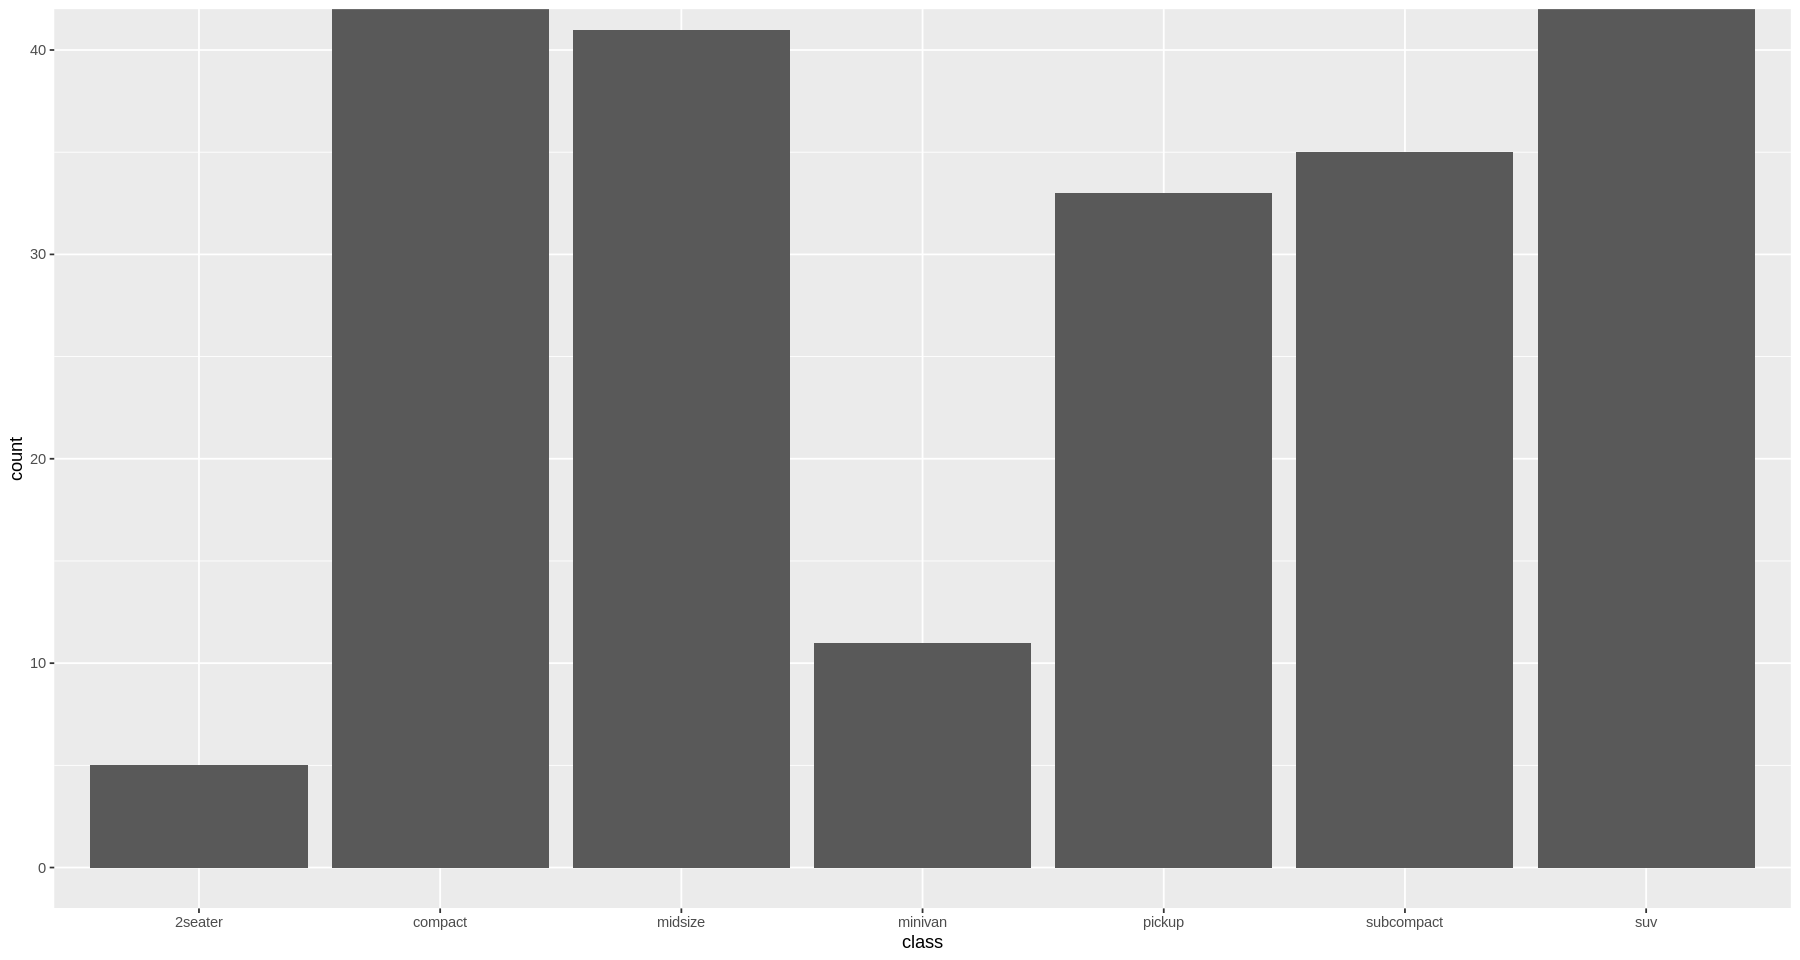

In [426]:
ggplot(mpg) +
    geom_bar(aes(x = class)) +
    scale_y_continuous(limits = c(0, 40))

ggplot(mpg) +
    geom_bar(aes(x = class)) +
    coord_cartesian(ylim = c(0, 40))

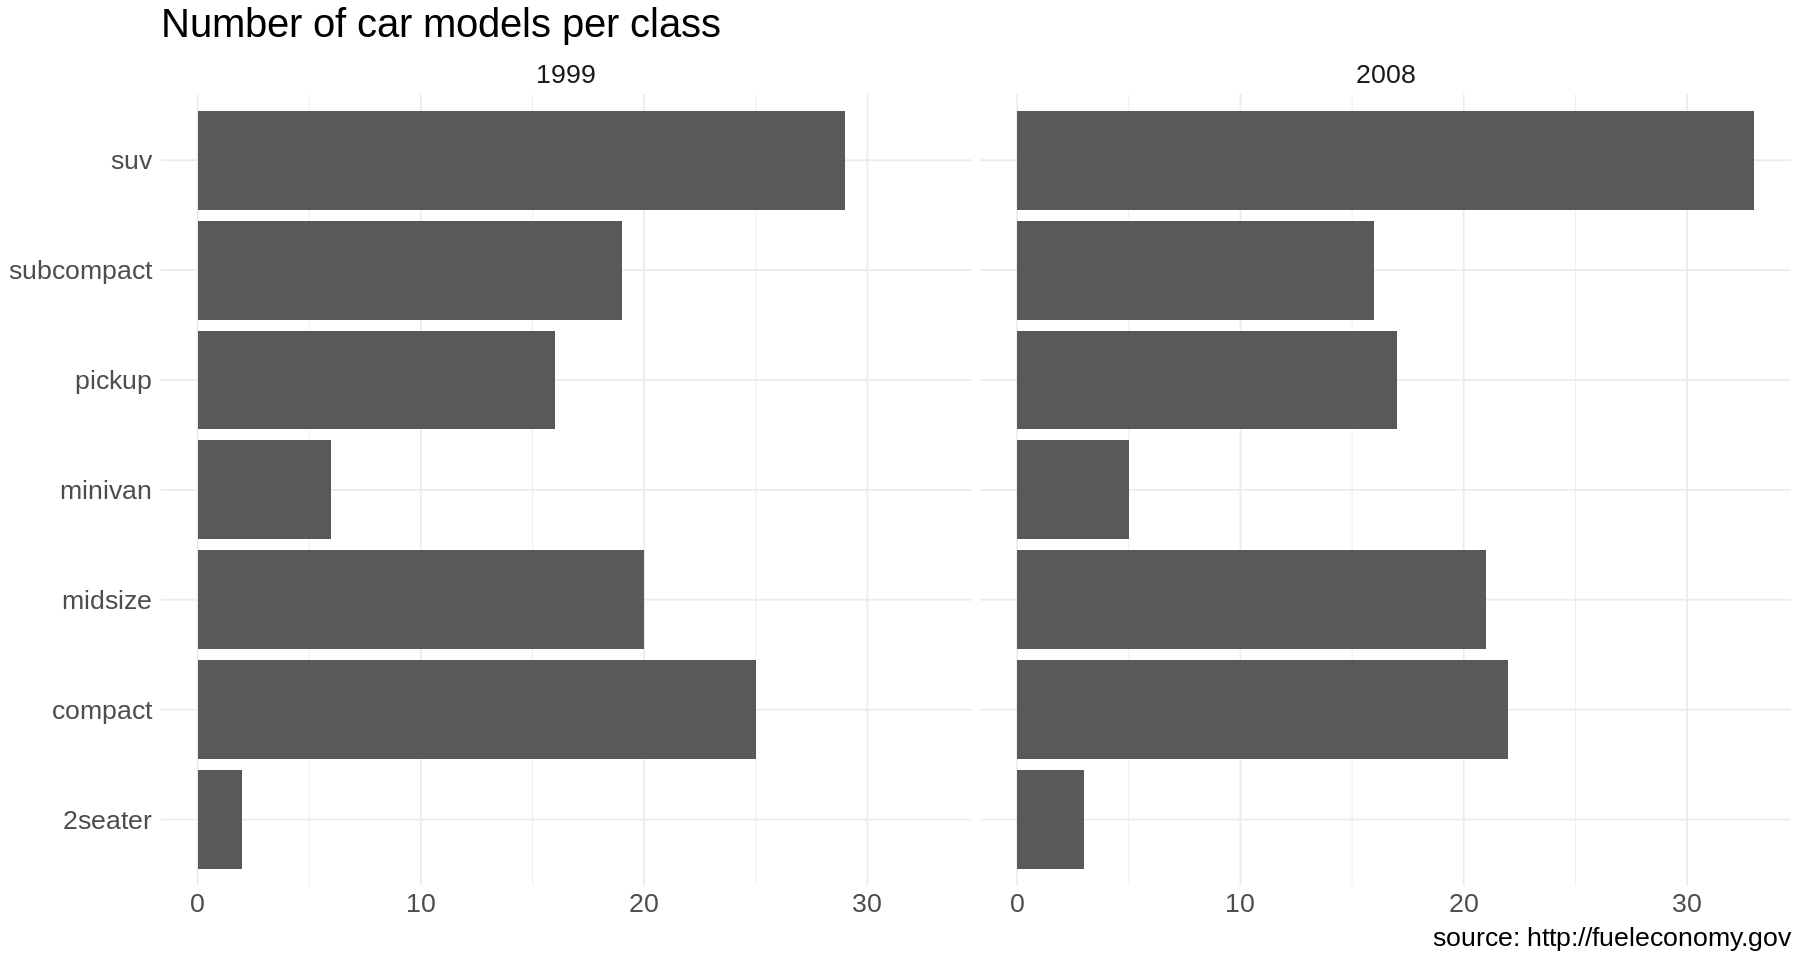

In [449]:
ggplot(mpg) +
    geom_bar(aes(y = class)) +
    facet_wrap(~ year) +
    labs(title = 'Number of car models per class', caption = 'source: http://fueleconomy.gov', x = NULL, y = NULL) +
    theme_minimal() +
    theme(text = element_text(size = 20))